<h1> Dataset Homicidio en colombia 2010 - 2022 </h1>

### Objetivos del proyecto 
- ¿Que genero es el mas asesinado en el periodo de tiempo del dataset? R
- ¿Cual es el Departamento que tiene mas homicidios? R
- ¿Cual es el Municipio que tiene mas homicidios? R 
- ¿Que grupo edad es el mas asesinado? R 
- ¿Que mes es el que ocurre mas asesinatos?
- ¿Cuantos Homiidios hay en cada año? R
- ¿Cual es el tipo de arma mas utilizada y cual es la mas utilizada en cada año? R
- ¿Cual es el tipo de arma mas utilizada para cometer los homicidios de los dos generos?
- Hacer una prediccion con modelos de Machine Learning con los siguientes algoritmos:
  - Arboles de decision
  - Regresion lineal
 

<h2>Leer datos</h2>
<p>
Nosotros usamos <code>pandas.read_csv()</code> esta funcion lee el archivo csv. Este dataset se descargo en la pagina Web de la policia nacional de colombia.<br>

Los datos no estan incluidos los encabezados, podemos agregar el siguiente argumento <code>headers = None</code> dentro de <code>read_csv()</code> metodo de pandas no  toma la primera fila como cabezeros.<br>

Puedemos tambien asignar al dataset una variable que nosotros creamos. 
Con el siguiente codigo <code>data.head(10)</code> nosotros imprimimos las 10 primeras filas de nuestro dataset.
</p>


In [48]:
import pandas as pd

data = pd.read_excel('C:/Users/user/Desktop/Data Analisis/Base_de_Datos_Homicidio_2010-2022.xlsx')
#data.to_csv('C:/Users/user/Desktop/Data Analisis/Base_de_Datos_Homicidio_2010-2022.csv', index=False)
data.head(10)

,ARMAS_MEDIOS,DEPARTAMENTO,MUNICIPIO,FECHA,GENERO,*AGRUPA EDAD,CODIGO_DANE,CANTIDAD
0,ARMA BLANCA / CORTOPUNZANTE,AMAZONAS,LETICIA (CT),2022-05-08,MASCULINO,ADULTOS,91001000,1
1,ARMA BLANCA / CORTOPUNZANTE,ANTIOQUIA,ABEJORRAL,2022-07-31,MASCULINO,ADULTOS,5002000,1
2,ARMA BLANCA / CORTOPUNZANTE,ANTIOQUIA,AMALFI,2022-07-16,MASCULINO,ADULTOS,5031000,1
3,ARMA BLANCA / CORTOPUNZANTE,ANTIOQUIA,ANDES,2022-02-13,MASCULINO,ADULTOS,5034000,1
4,ARMA BLANCA / CORTOPUNZANTE,ANTIOQUIA,ANDES,2022-04-15,MASCULINO,ADULTOS,5034000,1
5,ARMA BLANCA / CORTOPUNZANTE,ANTIOQUIA,ANDES,2022-05-14,MASCULINO,ADULTOS,5034000,1
6,ARMA BLANCA / CORTOPUNZANTE,ANTIOQUIA,ANDES,2022-06-04,MASCULINO,ADULTOS,5034000,1
7,ARMA BLANCA / CORTOPUNZANTE,ANTIOQUIA,ANDES,2022-06-25,MASCULINO,ADOLESCENTES,5034000,1
8,ARMA BLANCA / CORTOPUNZANTE,ANTIOQUIA,ANDES,2022-07-25,MASCULINO,ADULTOS,5034000,1
9,ARMA BLANCA / CORTOPUNZANTE,ANTIOQUIA,ANGOSTURA,2022-05-22,MASCULINO,ADULTOS,5038000,1


<p>
El siguiente codigo <code>data.tail()</code> muestra o imprime los ultimos datos del dataset.
</p>

In [49]:
data.tail()

,ARMAS_MEDIOS,DEPARTAMENTO,MUNICIPIO,FECHA,GENERO,*AGRUPA EDAD,CODIGO_DANE,CANTIDAD
140708,ARMA DE FUEGO,CESAR,VALLEDUPAR (CT),2010-12-31,MASCULINO,ADULTOS,20001000,1
140709,ARMA DE FUEGO,CUNDINAMARCA,BOGOTÁ D.C. (CT),2010-12-31,MASCULINO,ADULTOS,11001000,1
140710,ARMA DE FUEGO,QUINDÍO,MONTENEGRO,2010-12-31,MASCULINO,ADULTOS,63470000,1
140711,ARMA DE FUEGO,VALLE,CALI (CT),2010-12-31,MASCULINO,ADULTOS,76001000,3
140712,ARMA DE FUEGO,VALLE,PRADERA,2010-12-31,MASCULINO,ADULTOS,76563000,1


<p>
El codigo <code>print(data.shape)</code> muestra el total de filas y el total de columnas en este caso es:
(140713, 8)
</p>

In [50]:
print(data.shape)

(140713, 8)


<p> Para el anterior codigo que es  <code>data.columns</code> imprimimos todos las columnas de nuestro dataframe</p>

In [51]:
# Mostramos las columnas del DataSet
data.columns

Index(['ARMAS_MEDIOS', 'DEPARTAMENTO ', 'MUNICIPIO', 'FECHA ', 'GENERO',
       '*AGRUPA EDAD', 'CODIGO_DANE', 'CANTIDAD '],
      dtype='object')

<p> Ahora bien, para ver el tipo de dato de cada columna, ejecutamos el siguiente codigo <code>print(data.info())</code> </p>

In [52]:
#Exploramos la informacion del dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140713 entries, 0 to 140712
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ARMAS_MEDIOS   140713 non-null  object        
 1   DEPARTAMENTO   140713 non-null  object        
 2   MUNICIPIO      140713 non-null  object        
 3   FECHA          140713 non-null  datetime64[ns]
 4   GENERO         140713 non-null  object        
 5   *AGRUPA EDAD   140713 non-null  object        
 6   CODIGO_DANE    140713 non-null  int64         
 7   CANTIDAD       140713 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 8.6+ MB
None


<p> En el siguiente campo vamos a ver los datos estadisticos <code> print(data.describe())</code> 
    Tenemos que tener encuenta que:  
</p>

 - Solo va a evaluar a las columna numericas.
 - Std es la desviacion estandar, esto nos indica si tiene valores repetidos, si es igual a 1 toda      la columna tiene un unico valor.
 - min y max son los valores maximos y los valores minimos.
 - mean es la media de la columna 
 - 25%, 50% y 75% son los valores que tiene un 25, 50 y 75 porciento de esa columna.


In [53]:
print(data.describe())

        CODIGO_DANE      CANTIDAD 
count  1.407130e+05  140713.000000
mean   3.893282e+07       1.220314
std    2.854010e+07       0.727130
min    5.001000e+06       1.000000
25%    1.100100e+07       1.000000
50%    2.700100e+07       1.000000
75%    6.865500e+07       1.000000
max    9.977300e+07      25.000000


<p> El codigo <code>print(data.describe())</code> ahora vamos a ver los datos estadisticos
Solo aplica a las columnas numericas </p>

In [54]:
data['ARMAS_MEDIOS'].value_counts(dropna=False)
#dropna es para saber lo valores nulos de esa columna

ARMA DE FUEGO                         102546
ARMA BLANCA / CORTOPUNZANTE            30039
CONTUNDENTES                            5833
ARTEFACTO EXPLOSIVO/CARGA DINAMITA       448
CUERDA/SOGA/CADENA                       413
MINA ANTIPERSONA                         276
NO REPORTADO                             221
BOLSA PLASTICA                           167
PUNZANTES                                151
GRANADA DE MANO                          115
CORTANTES                                111
COMBUSTIBLE                               74
SIN EMPLEO DE ARMAS                       62
CINTAS/CINTURON                           54
ALMOHADA                                  43
VENENO                                    24
CILINDRO BOMBA                            22
SUSTANCIAS TOXICAS                        19
ARTEFACTO INCENDIARIO                     18
CARRO BOMBA                               16
MOTO BOMBA                                 8
QUIMICOS                                   7
PAQUETE BO

<p> El siguiendo codigo <code>data['ARMAS_MEDIOS'].value_counts(dropna=False)</code> dropna es para saber lo valores nulos de esa columna. </p>

In [55]:
from jupyterthemes import jtplot
jtplot.style()

<p> El codigo 
    <code>from jupyterthemes import jtplot
            jtplot.style()</code>
</p> 
 - La funcion es para cambiar el tema de las graficas como vamos a ver a continuacion.

count    140713.000000
mean          1.220314
std           0.727130
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          25.000000
Name: CANTIDAD , dtype: float64


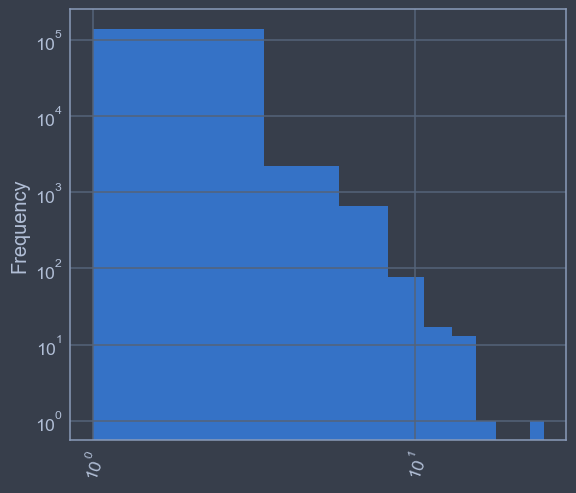

In [56]:
import matplotlib.pyplot as plt

# Esto se puede graficar unicamente con columnas numericas 
print(data['CANTIDAD '].describe())
data['CANTIDAD '].plot(kind='hist', rot=70, logx=True, logy= True)
plt.show()

<p> Ahora agregamos una columna de conteo de filas  <code> data['N_Filas'] = range(1, len(data) + 1)</code>   y con el codigo  <code> data.head(8) </code> imprimimos el resultado.</p>

In [57]:
#Agregamos una columna de Conteo de filas
data['N_Filas'] = range(1, len(data) + 1)
data.head(8)
#del data['Conteo_Filas']

,ARMAS_MEDIOS,DEPARTAMENTO,MUNICIPIO,FECHA,GENERO,*AGRUPA EDAD,CODIGO_DANE,CANTIDAD,N_Filas
0,ARMA BLANCA / CORTOPUNZANTE,AMAZONAS,LETICIA (CT),2022-05-08,MASCULINO,ADULTOS,91001000,1,1
1,ARMA BLANCA / CORTOPUNZANTE,ANTIOQUIA,ABEJORRAL,2022-07-31,MASCULINO,ADULTOS,5002000,1,2
2,ARMA BLANCA / CORTOPUNZANTE,ANTIOQUIA,AMALFI,2022-07-16,MASCULINO,ADULTOS,5031000,1,3
3,ARMA BLANCA / CORTOPUNZANTE,ANTIOQUIA,ANDES,2022-02-13,MASCULINO,ADULTOS,5034000,1,4
4,ARMA BLANCA / CORTOPUNZANTE,ANTIOQUIA,ANDES,2022-04-15,MASCULINO,ADULTOS,5034000,1,5
5,ARMA BLANCA / CORTOPUNZANTE,ANTIOQUIA,ANDES,2022-05-14,MASCULINO,ADULTOS,5034000,1,6
6,ARMA BLANCA / CORTOPUNZANTE,ANTIOQUIA,ANDES,2022-06-04,MASCULINO,ADULTOS,5034000,1,7
7,ARMA BLANCA / CORTOPUNZANTE,ANTIOQUIA,ANDES,2022-06-25,MASCULINO,ADOLESCENTES,5034000,1,8


<p> Hacemos una diagrama de caja para visualizar y comparar la distribucion y la tendencia centrales de valores numericos mediante sus cuartiles, en este caso vamos a mirarlo en con la columna de genero. 
    <code> data.boxplot(column='N_Filas', by='GENERO', rot=90) </code>
 </p>

<Axes: title={'center': 'N_Filas'}, xlabel='GENERO'>

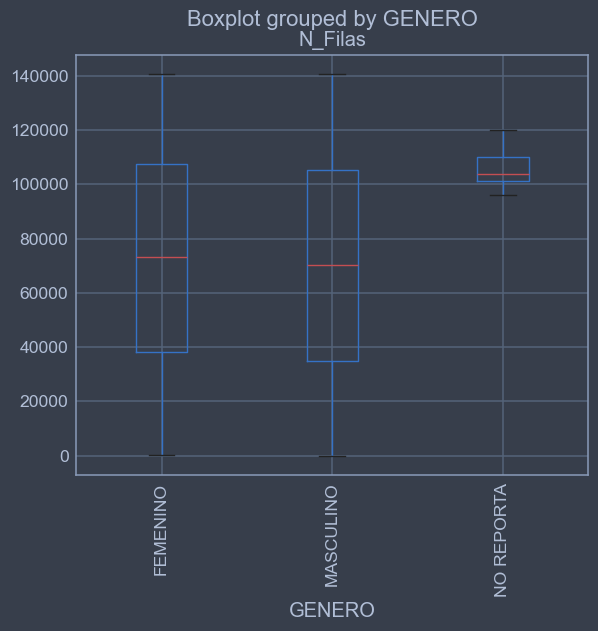

In [58]:
data.boxplot(column='N_Filas', by='GENERO', rot=90)

<Axes: title={'center': 'N_Filas'}, xlabel='*AGRUPA EDAD'>

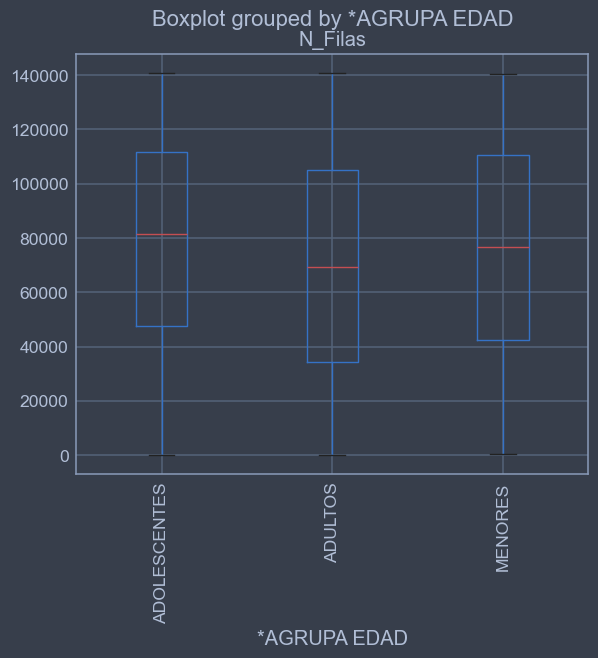

In [59]:
data.boxplot(column='N_Filas', by='*AGRUPA EDAD', rot=90)

<p> Podemos evidenciar mediante el diagrama de cajas el genero femeninno tiene una media mas que el genero masculino, eso nos quiere decir que es mas comun los homicidios para el genero femenino lastimosamente </p>

In [60]:
#data[["GENERO"]] = data[["GENERO"]].astype("str")
#data.info()

<h3>1. Limpieza</h3>

Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:

1. Datos faltantes en algunas celdas
2. Columnas irrelevantes (que no responden al problema que queremos resolver)
3. Registros (filas) repetidos
4. Valores extremos (*outliers*) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos
5. Errores tipográficos en el caso de las variables categóricas

Al final de este proceso de limpieza deberíamos tener un set de datos **íntegro**, listo para la fase de Análisis Exploratorio.

Ahora vamos a observar el tipo de dato de las columnas, para ello debemos ejecutar el siguiente codigo <code>data.info()</code> para visualizar el tipo de dato de cada columna, vamos a tener distintos tipos de datos, como lo son:
 - Object
 - Int
 - dateTime 

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140713 entries, 0 to 140712
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ARMAS_MEDIOS   140713 non-null  object        
 1   DEPARTAMENTO   140713 non-null  object        
 2   MUNICIPIO      140713 non-null  object        
 3   FECHA          140713 non-null  datetime64[ns]
 4   GENERO         140713 non-null  object        
 5   *AGRUPA EDAD   140713 non-null  object        
 6   CODIGO_DANE    140713 non-null  int64         
 7   CANTIDAD       140713 non-null  int64         
 8   N_Filas        140713 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 9.7+ MB


## 1.1 Datos faltantes

Acá comenzamos a ver que los datos no están completos, pues no todas las columnas tienen la misma cantidad de registros.

El número total de registros debería ser 45.215. Sin embargo columnas como "job", "marital", "education", "balance", "duration" y "pdays".

Por ser tan pocos los datos  faltantes optaremos por eliminar las filas correspondientes:

In [62]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140713 entries, 0 to 140712
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ARMAS_MEDIOS   140713 non-null  object        
 1   DEPARTAMENTO   140713 non-null  object        
 2   MUNICIPIO      140713 non-null  object        
 3   FECHA          140713 non-null  datetime64[ns]
 4   GENERO         140713 non-null  object        
 5   *AGRUPA EDAD   140713 non-null  object        
 6   CODIGO_DANE    140713 non-null  int64         
 7   CANTIDAD       140713 non-null  int64         
 8   N_Filas        140713 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 9.7+ MB


## 1.2 Columnas irrelevantes

Una columna irrelevante puede ser:

- **Una columna que no contiene información relevante para el problema que queremos resolver**. Por ejemplo en este caso podría ser una columna que no guarde relación con el posible perfil del proyecto o caso  (codigo Dane, comida favorita de la persona asesionada, etc.)
- **Una columna categórica pero con un sólo nivel**. Por ejemplo si en la columna "job" solo tuviésemos el nivel "unknown".
- **Una columna numérica pero con un sólo valor**. Por ejemplo si tuvieramos una columna "edad" todos los vlaores fuesen iguales a 50.
- **Columnas con información redundante**. Por ejemplo si además de las columnas "Genero" tuviésemos la columna "sexo".

Si tenemos la duda de si alguna columna puede ser relevante o no lo mejor es dejarla (y más adelante en posteriores etapas podremos darnos cuenta de si se debe preservar o no).

En este caso todas las columnas pueden resultar relevantes, pero debemos verificar que no haya columnas categóricas con un sólo nivel, o columnas numéricas con un sólo valor

<p> Una de las formas para saber si esa columna es importante es mirando en numero de subniveles, si este contiene solo un subnivel eso quiere decir que solo cuenta con un valor diferente, para saber losiguiente, realizamos el siguiente codigo </p>
 

In [63]:
# Conteo de los niveles en las diferentes columnas categóricas
cols_cat = ['ARMAS_MEDIOS', 'DEPARTAMENTO ', 'MUNICIPIO', 'FECHA ', 'GENERO',
       '*AGRUPA EDAD', 'CODIGO_DANE', 'CANTIDAD ', 'N_Filas']

for col in cols_cat:
  print(f'Columna {col}: {data[col].nunique()} subniveles')

Columna ARMAS_MEDIOS: 37 subniveles
Columna DEPARTAMENTO : 32 subniveles
Columna MUNICIPIO: 1008 subniveles
Columna FECHA : 4626 subniveles
Columna GENERO: 3 subniveles
Columna *AGRUPA EDAD: 3 subniveles
Columna CODIGO_DANE: 1083 subniveles
Columna CANTIDAD : 17 subniveles
Columna N_Filas: 140713 subniveles


Todas las columnas categóricas tienen más de 1 subnivel. No eliminaremos ninguna.

Verifiquemos lo que ocurre con las columnas numéricas:

In [64]:
data.describe()

,CODIGO_DANE,CANTIDAD,N_Filas
count,1.407130e+05,140713.000000,140713.000000
mean,3.893282e+07,1.220314,70357.000000
std,2.854010e+07,0.727130,40620.488552
min,5.001000e+06,1.000000,1.000000
25%,1.100100e+07,1.000000,35179.000000
50%,2.700100e+07,1.000000,70357.000000
75%,6.865500e+07,1.000000,105535.000000
max,9.977300e+07,25.000000,140713.000000


Todas las columnas numéricas tienen desviaciones estándar ("std") diferentes de cero, lo que indica que no tienen un único valor.

Preservaremos todas las columnas numéricas.

A continuacion vamos a ver el tamaño de nuestro dataframe 

In [65]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {data.shape}')
data.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {data.shape}')

Tamaño del set antes de eliminar las filas repetidas: (140713, 9)
Tamaño del set después de eliminar las filas repetidas: (140713, 9)


## 1.4 *Outliers* en las variables numéricas

No siempre se deben eliminar los *outliers* porque dependiendo de la variable numérica analizada estos pueden contener información importante.

Creemos gráficas tipo "boxplot" de las columnas numéricas:

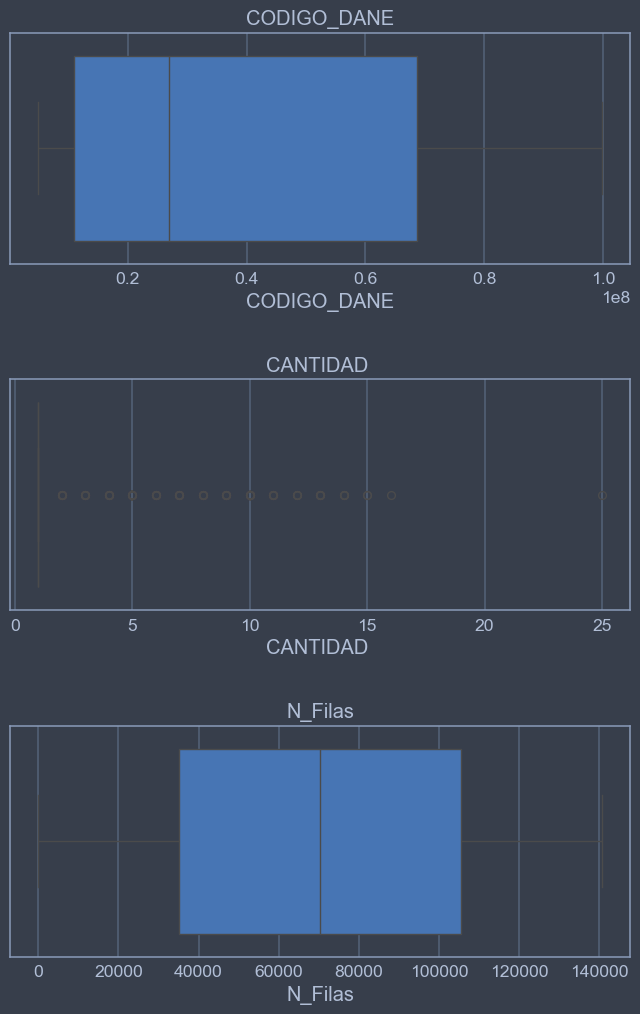

In [66]:
# Generar gráficas individuales pues las variables numéricas
# están en rangos diferentes
import seaborn as sns
cols_num = ['CODIGO_DANE', 'CANTIDAD ', 'N_Filas']
num_cols = len(cols_num)

fig, ax = plt.subplots(nrows=num_cols, ncols=1, figsize=(8, num_cols * 4))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)


**Observaciones:**
- "Armas": Los valores estan muy distribuidos en los 37 subniveles que estan en esta columna por        esta razon no podiamos relizar este diagrama
- "Fecha": Hay mas sucesos entre el periodo 2013 al 2019 y es imposible de graficar por que es una      columna categorica
- La columnas que si se pudieron graficar muestra un comportamiento anormal por el tipo de columna que son, debido a que son columnas de identificativos.


Si nesecitamos eliminar registros son con el siguiente comando 
Ejemplo: Eliminar filas con "age">100                             
<code> data = data[data['age']<=100] </code>


## 1.5 Errores tipográficos en variables categóricas

En una variable categórica pueden aparecer sub-niveles como "unknown" y "UNK" o tambien los famosos NaN que para nosotros son equivalentes pero que para nuestro programa parecerían diferentes.

Se deben unificar estos sub-niveles

### Graficar los subniveles de cada variable categórica
En este caso no graficaremos las columnas categoricas por las grandes cantidades de subniveles que contiene
<code> cols_num = ['ARMAS_MEDIOS', 'DEPARTAMENTO ', 'MUNICIPIO', 'FECHA ','GENERO', '*AGRUPA EDAD', 'CODIGO_DANE', 'CANTIDAD ', 'N_Filas'] 

fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
</code>

Inicialmente se observa que hay sub-niveles con el mismo nombre pero escritos en minúscula, en mayúscula o con la primera letra en mayúscula.

Unifiquemos estos sub-niveles inicialmente:

<h1> Exploracion de los Datos </h1>

# 2. Análisis exploratorio

La idea es usar herramientas estadísticas y de visualización para:

- Crear un mapa mental del set de datos (entenderlo)
- Empezar a encontrar respuestas a la pregunta planteada inicialmente (¿qué perfil tienen los clientes con mayor potencial de conversión?)

Llevaremos a cabo estas fases:

1. Análisis de cada variable de manera individual
2. Análisis univariado: relación de cada variable predictora con la variable a predecir
3. Análisis bivariado: relación de pares de variables predictoras con la variable a predecir

## 2.1 Análisis de cada variable de manera individual

Nos permite entender las características generales de cada variable de nuestro set de datos.
Con <code>data.info()</code> podemos ver las variables categóricas

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140713 entries, 0 to 140712
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ARMAS_MEDIOS   140713 non-null  object        
 1   DEPARTAMENTO   140713 non-null  object        
 2   MUNICIPIO      140713 non-null  object        
 3   FECHA          140713 non-null  datetime64[ns]
 4   GENERO         140713 non-null  object        
 5   *AGRUPA EDAD   140713 non-null  object        
 6   CODIGO_DANE    140713 non-null  int64         
 7   CANTIDAD       140713 non-null  int64         
 8   N_Filas        140713 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 10.7+ MB


Object son variables categoricas y variables string 

Tomemos las variables categóricas y generemos gráficos de barras

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\user\AppData\Local\Temp\ipykernel_17632\3551574792.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\user\AppData\Local\Temp\ipykernel_17632\3551574792.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)


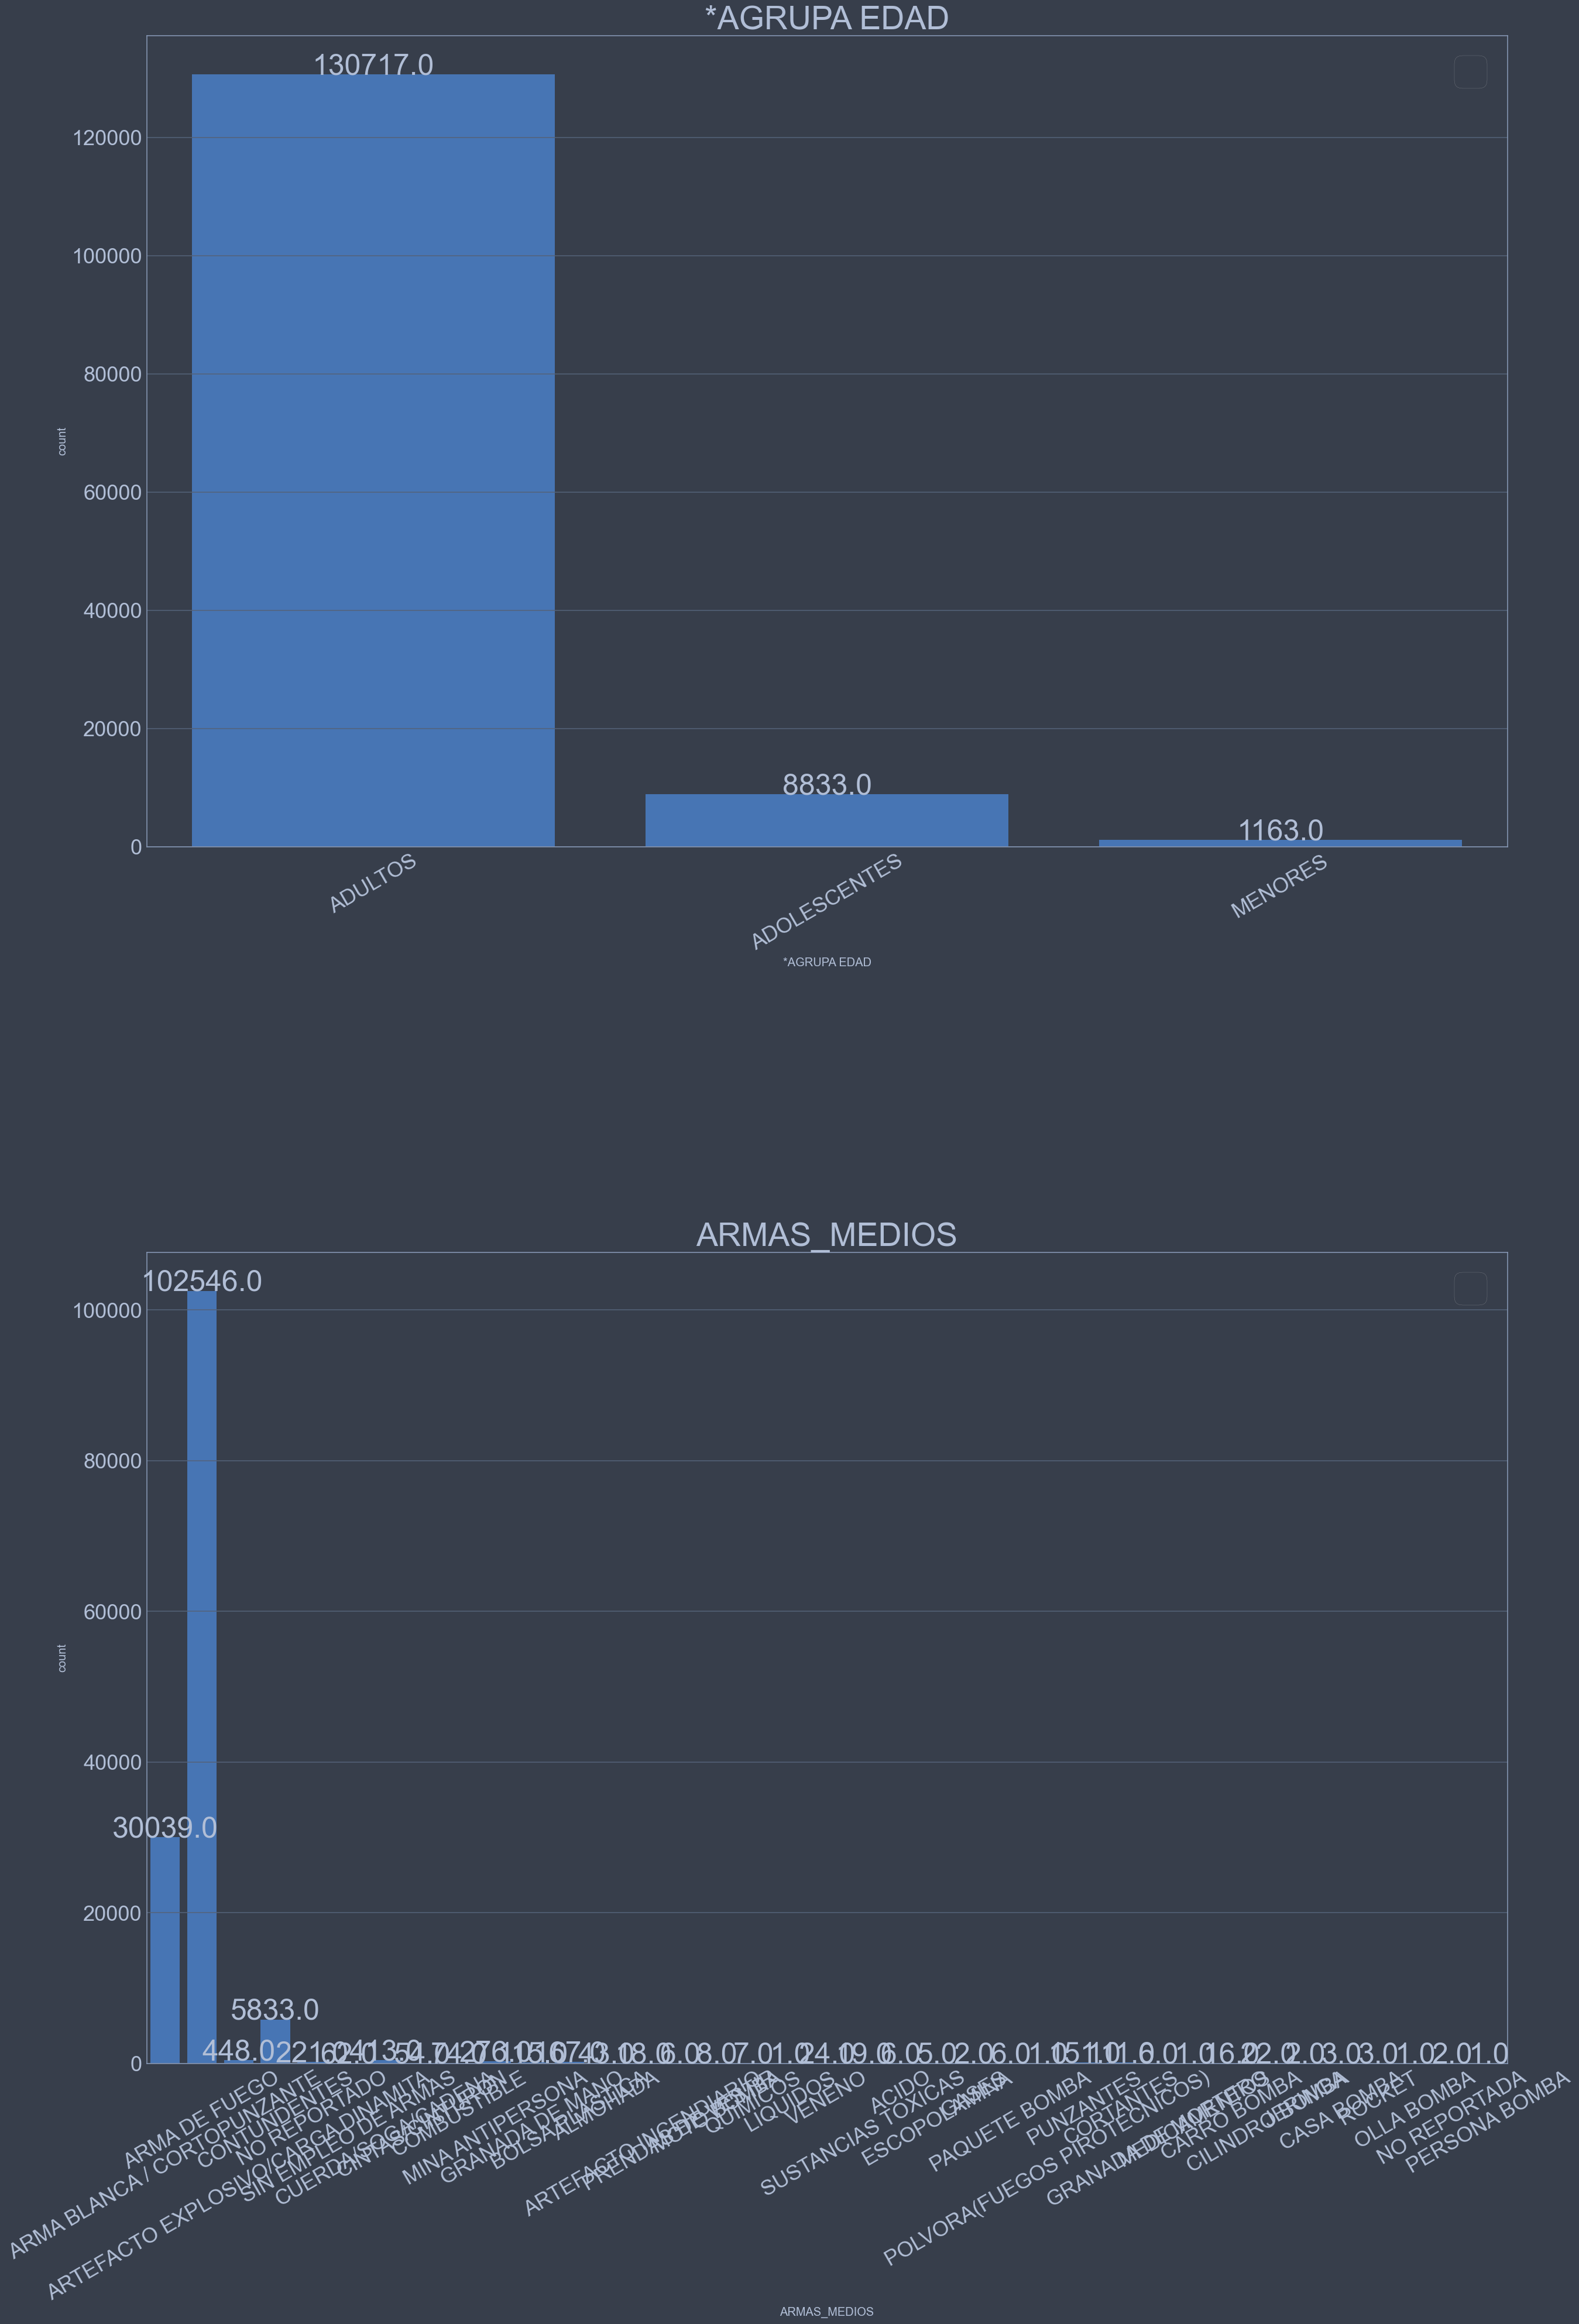

In [68]:
Column_data = ['*AGRUPA EDAD', 'ARMAS_MEDIOS']

# Gráficos de barras de conteo
fig, ax = plt.subplots(nrows=len(Column_data), ncols=1, figsize=(30,45))
fig.subplots_adjust(hspace=0.5)

N = 10

for i, col in enumerate(Column_data):
  top_N_values = data[col].value_counts().nlargest(N).index.tolist()
  data_filtered = data[data[col].isin(top_N_values)]
  sns.countplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_title(col, fontsize=40)
  ax[i].legend(fontsize=50)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
     # Aumentar el tamaño de la fuente en los valores de las barras
  for p in ax[i].patches:
   ax[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=36)
  ax[i].tick_params(axis='x', labelsize=26)
  ax[i].tick_params(axis='y', labelsize=26)

Como en las columnas de Departamento y Arma medio los subniveles son bastantes, tenemos que realizar 
un filtro para que se visualice de una manera mas ordenada, para eso vamos a filtrar por los primeros 10 subniveles.

C:\Users\user\AppData\Local\Temp\ipykernel_17632\2005714533.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.index, y=top_10.values, palette="viridis")


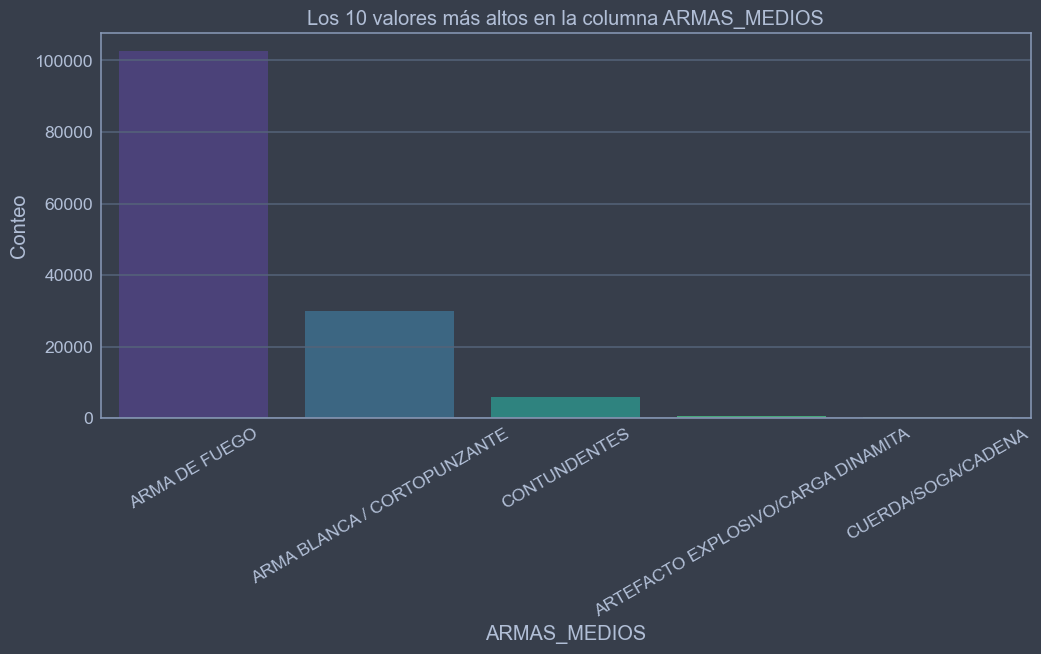

In [69]:
'''import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
'''
# Supongamos que tienes un DataFrame llamado "data" y quieres graficar los 10 valores más altos de una columna específica.
# Reemplaza "nombre_columna" con el nombre de la columna que deseas graficar.

columna = 'ARMAS_MEDIOS'
top_10 = data[columna].value_counts().nlargest(5)

# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(12, 5))
sns.barplot(x=top_10.index, y=top_10.values, palette="viridis")
plt.title(f'Los 10 valores más altos en la columna {columna}')
plt.xlabel(columna)
plt.ylabel('Conteo')
plt.xticks(rotation=30)
plt.show()


Vamos a renombrar columna, para ello vamos hacer el siguiente paso:

In [70]:
# Utiliza una condición para renombrar el subnivel específico
data.loc[data['ARMAS_MEDIOS'] == 'ARMA BLANCA / CORTOPUNZANTE', 'ARMAS_MEDIOS'] = 'ARMA BLANCA-CORTO'
data.loc[data['ARMAS_MEDIOS'] == 'ARTEFACTO EXPLOSIVO/CARGA DINAMITA', 'ARMAS_MEDIOS'] = 'ARTEFACTO EXPLO'

Nuevamente ejcutamos el codigo para visualizar los cambios generados.

C:\Users\user\AppData\Local\Temp\ipykernel_17632\2928036475.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.index, y=top_10.values, palette="viridis")


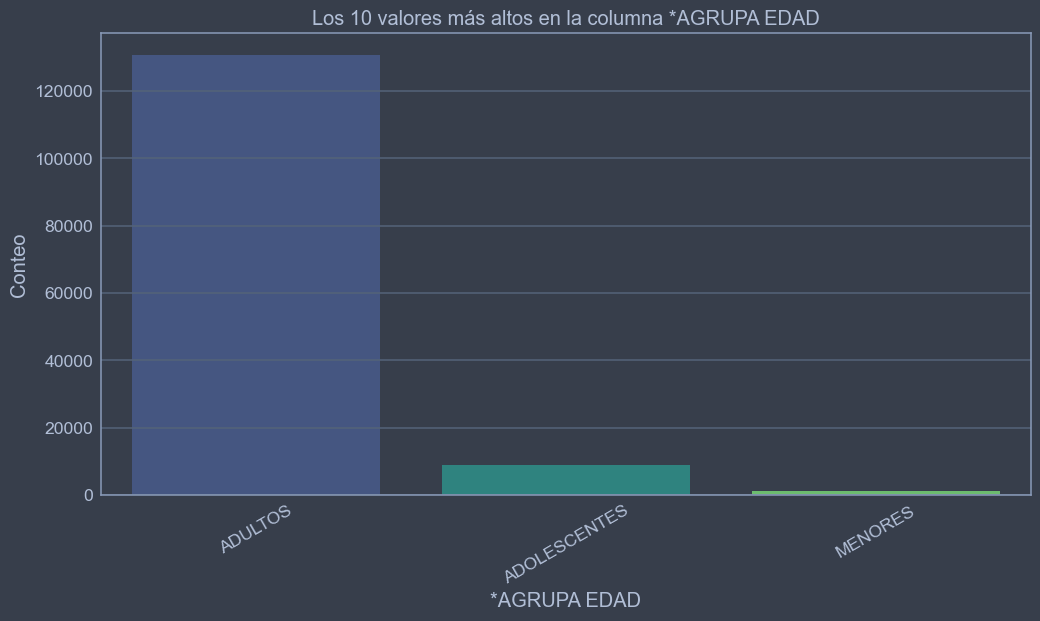

C:\Users\user\AppData\Local\Temp\ipykernel_17632\2928036475.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.index, y=top_10.values, palette="viridis")


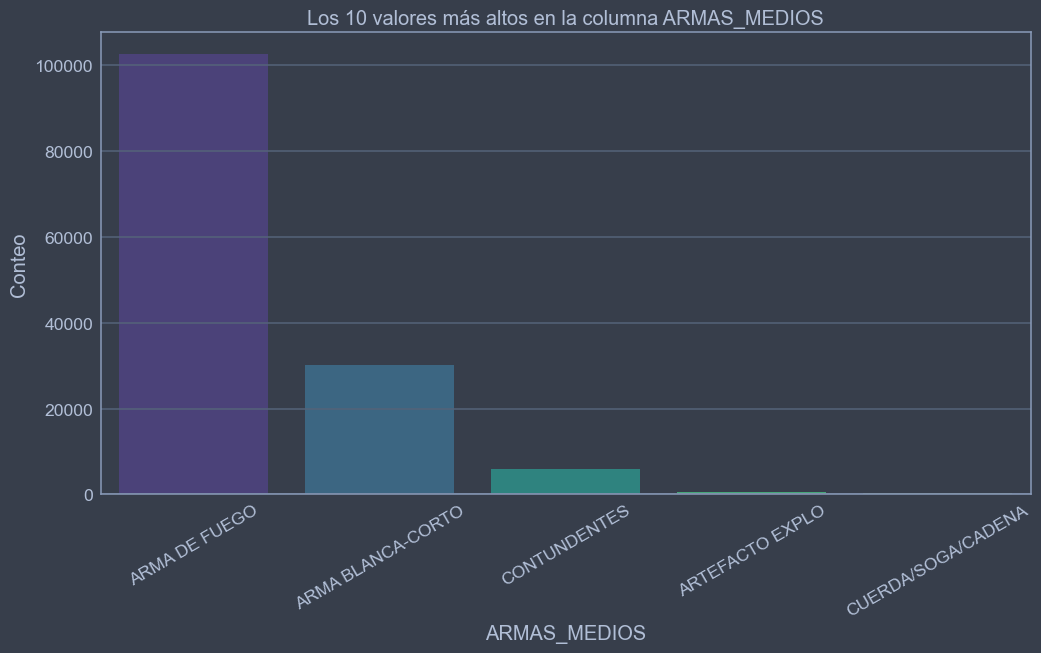

C:\Users\user\AppData\Local\Temp\ipykernel_17632\2928036475.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.index, y=top_10.values, palette="viridis")


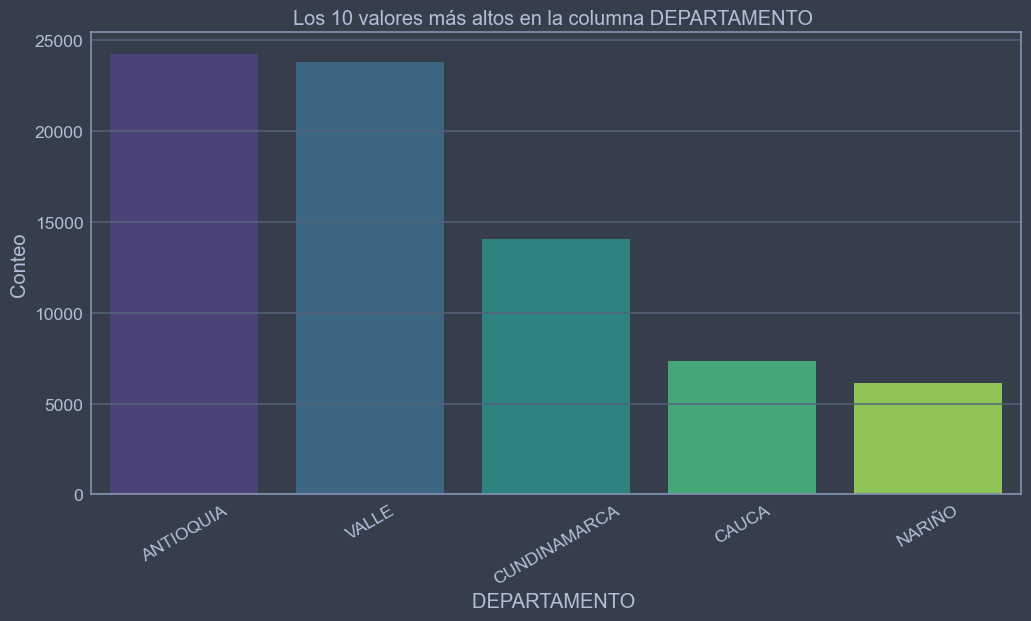

C:\Users\user\AppData\Local\Temp\ipykernel_17632\2928036475.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.index, y=top_10.values, palette="viridis")


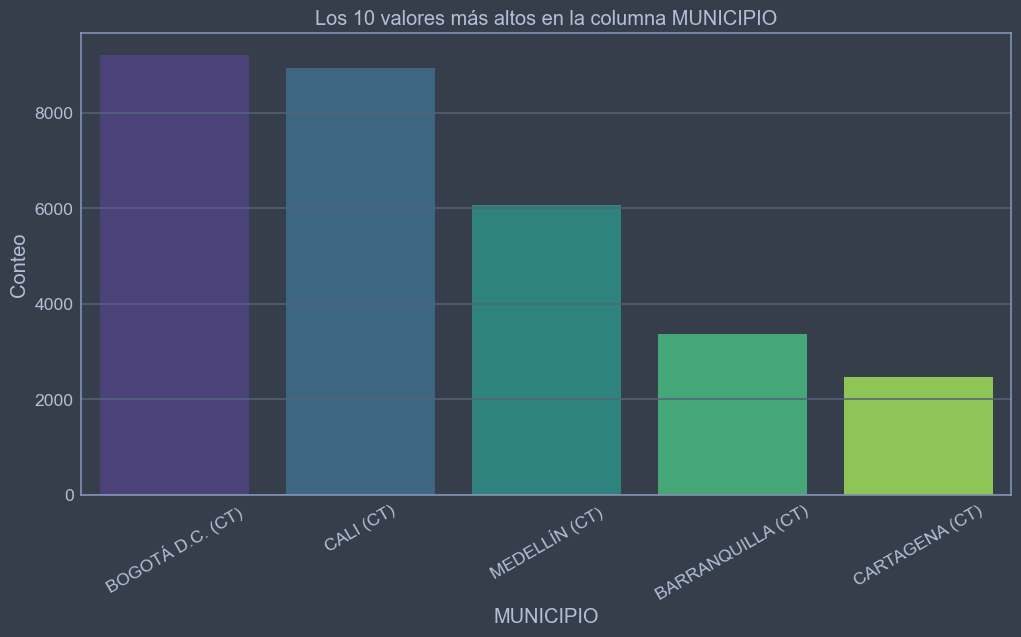

C:\Users\user\AppData\Local\Temp\ipykernel_17632\2928036475.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.index, y=top_10.values, palette="viridis")


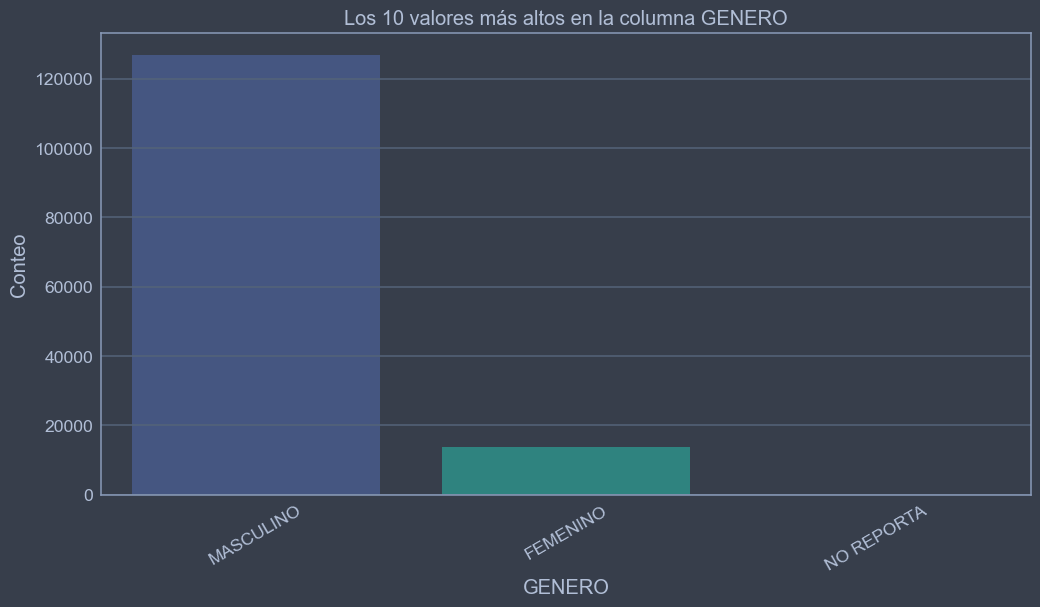

In [71]:

Columna = ['*AGRUPA EDAD', 'ARMAS_MEDIOS','DEPARTAMENTO ','MUNICIPIO','GENERO']
#columna = 'ARMAS_MEDIOS'

for col in Columna:
    top_10 = data[col].value_counts().nlargest(5)

    # Crear el gráfico de barras con Seaborn
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_10.index, y=top_10.values, palette="viridis")
    plt.title(f'Los 10 valores más altos en la columna {col}')
    plt.xlabel(col)
    plt.ylabel('Conteo')
    plt.xticks(rotation=30)
    plt.show()


# Respuesta de preguntas
### Observaciones:

- 'Agrupacion Agrupa edad': Podemos evidenciar que los mas afectados son los adultos (3 SUBNIVELES)
- 'Armas Medio': El arma mas utilizada para realizar esta accion es el arma de fuego ,          (Setuvieron mas de 20 subniveles, pero se califico con los 5 subniveles que pueden ver)
- 'Departamento': El departamento con mas homicidios registrados es Antioquia,                         (Setuvieron mas de 20 subniveles, pero se califico con los 5 subniveles que pueden ver)
- 'Municipio': El municipio con mas homicidios fue Bogota, pero esta con un valor igual cali,       
(Setuvieron mas de 20 subniveles, pero se califico con los 5 subniveles que pueden ver).


Determinamos si la columna cantidad es importante para nuestro Analisis exploratorio, para ello debemos
relizar el siguiente filtro:

In [72]:
condicion = data['CANTIDAD '] > 1
resultado = data[condicion]
resultado.tail(5)

,ARMAS_MEDIOS,DEPARTAMENTO,MUNICIPIO,FECHA,GENERO,*AGRUPA EDAD,CODIGO_DANE,CANTIDAD,N_Filas
140678,ARMA DE FUEGO,ANTIOQUIA,SANTA BÁRBARA,2010-12-30,MASCULINO,ADULTOS,5679000,2,140679
140680,ARMA DE FUEGO,ATLÁNTICO,BARRANQUILLA (CT),2010-12-30,MASCULINO,ADULTOS,8001000,2,140681
140693,ARMA DE FUEGO,VALLE,CALI (CT),2010-12-30,MASCULINO,ADULTOS,76001000,4,140694
140694,ARMA DE FUEGO,VALLE,GUADALAJARA DE BUGA,2010-12-30,MASCULINO,ADULTOS,76111000,2,140695
140711,ARMA DE FUEGO,VALLE,CALI (CT),2010-12-31,MASCULINO,ADULTOS,76001000,3,140712


En la anterior celda podemos observar que la columna Cantidad es relevante en nuestro analisis,
debido a que esta cuenta el numero de homicidios del dia que ocurrieron. Sin embargo, la columna CODIGO_DANE es irelevante para nuestro estudio, por la razon que esta columna solo sirve como indicativo para la policia nacional y el DANE.  

In [73]:
data.drop(columns=['CODIGO_DANE'],inplace=True)
data.head(5)

,ARMAS_MEDIOS,DEPARTAMENTO,MUNICIPIO,FECHA,GENERO,*AGRUPA EDAD,CANTIDAD,N_Filas
0,ARMA BLANCA-CORTO,AMAZONAS,LETICIA (CT),2022-05-08,MASCULINO,ADULTOS,1,1
1,ARMA BLANCA-CORTO,ANTIOQUIA,ABEJORRAL,2022-07-31,MASCULINO,ADULTOS,1,2
2,ARMA BLANCA-CORTO,ANTIOQUIA,AMALFI,2022-07-16,MASCULINO,ADULTOS,1,3
3,ARMA BLANCA-CORTO,ANTIOQUIA,ANDES,2022-02-13,MASCULINO,ADULTOS,1,4
4,ARMA BLANCA-CORTO,ANTIOQUIA,ANDES,2022-04-15,MASCULINO,ADULTOS,1,5


In [74]:
data.head(5)

,ARMAS_MEDIOS,DEPARTAMENTO,MUNICIPIO,FECHA,GENERO,*AGRUPA EDAD,CANTIDAD,N_Filas
0,ARMA BLANCA-CORTO,AMAZONAS,LETICIA (CT),2022-05-08,MASCULINO,ADULTOS,1,1
1,ARMA BLANCA-CORTO,ANTIOQUIA,ABEJORRAL,2022-07-31,MASCULINO,ADULTOS,1,2
2,ARMA BLANCA-CORTO,ANTIOQUIA,AMALFI,2022-07-16,MASCULINO,ADULTOS,1,3
3,ARMA BLANCA-CORTO,ANTIOQUIA,ANDES,2022-02-13,MASCULINO,ADULTOS,1,4
4,ARMA BLANCA-CORTO,ANTIOQUIA,ANDES,2022-04-15,MASCULINO,ADULTOS,1,5


Ahora vamos a observar la varibles numericas con el siguiente codigo <code> data.describe()</code>

In [75]:
data.describe()

,CANTIDAD,N_Filas
count,140713.000000,140713.000000
mean,1.220314,70357.000000
std,0.727130,40620.488552
min,1.000000,1.000000
25%,1.000000,35179.000000
50%,1.000000,70357.000000
75%,1.000000,105535.000000
max,25.000000,140713.000000


Para un analisis mas detallado haremos un histograma para esta columnas numericas

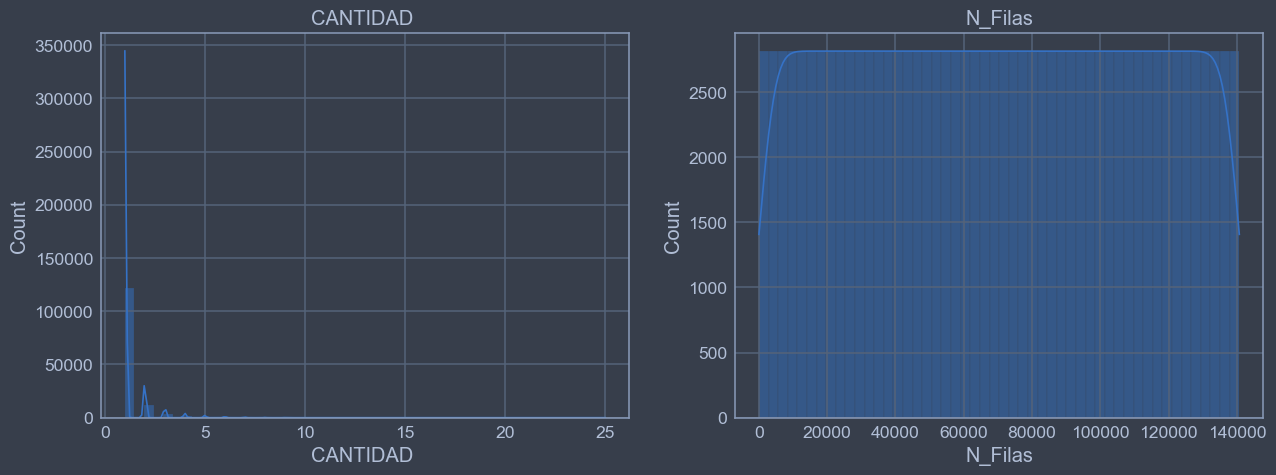

In [76]:
# Pero muchas veces es más útil graficar dichas variables

# Dibujar histogramas
col_num = ['CANTIDAD ', 'N_Filas']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_num):
    if col == 'age':
        nbins = 10
    else:
        nbins = 50
    sns.histplot(x=col, data=data, ax=ax[i], bins=nbins, kde = True)
    ax[i].set_title(col)

En la grafica de N_Filas se ve muy grande el conteo de niveles de esta columna, esto es muy normal debido que es una variable para contar las filas del Datafram, en cambio la columna CANTIDAD  podemos ver que los valores que mas hay es el valor de 1, sto es porque el valor que mas se repite es 1 homicidio por fila.

In [77]:
data['CANTIDAD '].describe()

count    140713.000000
mean          1.220314
std           0.727130
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          25.000000
Name: CANTIDAD , dtype: float64

Con lo anterior presentado podemos evidenciar lo que afirmamos, un 75% de las filas solo cuentan con un homicidio, esto quiere decir que la cantidad de homicidios de ese mismo hecho es de 1 en un 75 % de todas las veces.

## Observaciones:

- La columna N_Filas es una columna para idenificar y enumerar cada fila del Dataframe.
- La mayor parte de la columna CANTIDAD (75%) tiene un  valor de 1 (un) homicidio generado.

## 2.2 Análisis univariado

Teniendo claras algunas características generales de cada dato individual, la idea ahora es analizar si existe alguna relación entre las posibles variables predictoras ('Genero', 'GRUPO EDAD', 'ARMAS', Etc.

Esto se conoce como análisis univariado. 

Este análisis nos mostrará sólo una faceta de las posibles relaciones entre una cada variable predictora y la variable a predecir, y no es suficiente para extraer conclusiones definitivas.

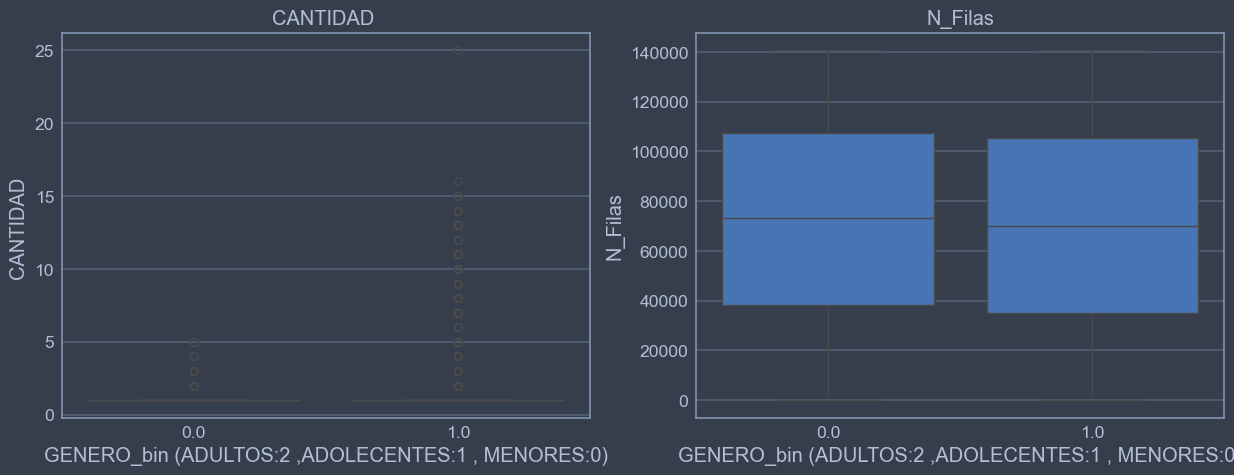

In [78]:
# Comencemos representando la variable a predecir de forma binaria:
# 'yes' = 1, 'no' = 0
diccionario = {'ADULTO':2, 'ADOLECENTE':1 , 'MENORES':0}
binario = data['*AGRUPA EDAD'].map(diccionario)
data['*AGRUPA EDAD_bin'] = binario

diccionario1 = {'MASCULINO':1, 'FEMENINO':0}
binario1 = data['GENERO'].map(diccionario1)
data['GENERO_bin'] = binario1

# De esta forma resulta fácil calcular la tasa de conversión: el promedio
# de la columna 'y_bin'
# Analizar la relación entre las variables numéricas y la variable a predecir ('y')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.subplots_adjust(hspace=.25)

for i, col in enumerate(col_num):
  bplt = sns.boxplot(x="GENERO_bin", y=col, data=data, ax=ax[i])
  ax[i].set_xlabel('GENERO_bin (ADULTOS:2 ,ADOLECENTES:1 , MENORES:0)')
  ax[i].set_title(col)

## Observaciones:

- En 'N_Filas' no se observan diferencias entre las personas categorizadas como adultas, adolecentes y menores.
- Al parecer las variables numéricas no resultan en principio siendo variables predictivas.

- Sin embargo estas variables numéricas se encuentran en un amplio rango.


In [79]:
# Función para graficar tasas de conversión

def graficar_tasas_conversion(var_predictora, var_predecir, type='line', order=None):
    x, y = var_predictora, var_predecir

    # Generar agrupaciones (groupby), calcular tasa de conversión (mean),
    # multiplicarla por 100 (mul(100))
    grupo = data.groupby(x)[y].mean().mul(100).rename('tasa_conv').reset_index()

    # Y generar gráfica
    if type=='line': # Útil para rangos continuos
        plt.figure(figsize=(10,6))
        sns.lineplot(x=var_predictora, y='tasa_conv', data=grupo)
        plt.grid()
    elif type=='bar': # Útil si los datos están divididos en rangos o son categóricos
        plt.figure(figsize=(14,6))
        sns.barplot(x=var_predictora, y='tasa_conv', data=grupo, order=order)
        plt.grid()
    elif type=='scatter': # Útil si los datos están divididos en rangos o son categóricos
        plt.figure(figsize=(10,6)) 
        sns.scatterplot(x=var_predictora, y='tasa_conv', data=grupo)
        plt.grid()

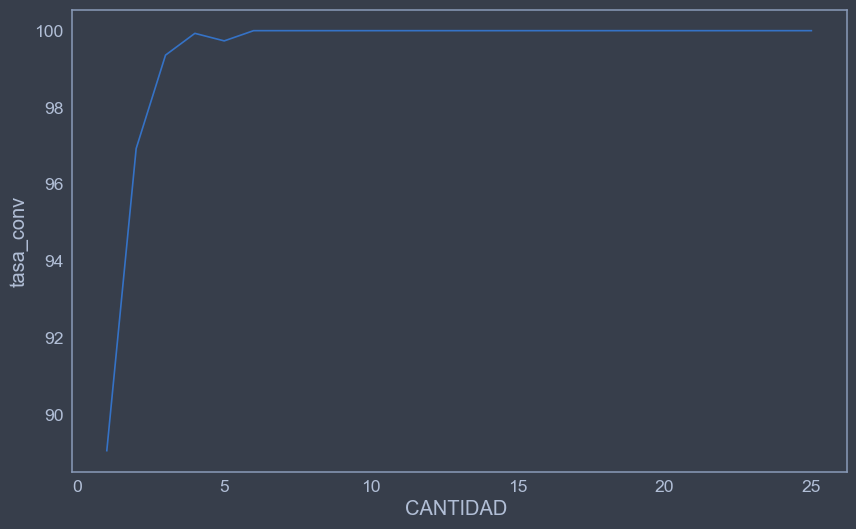

In [80]:
# Y graficar las tasas de conversión para la variable edad
graficar_tasas_conversion('CANTIDAD ','GENERO_bin')

## Observaciones:

- Podemos observar como se distribuye con el diccionario que creamos anteriormente.
- Podríamos establecer tres rangos aproximados: Adolecentes, Adultos y Menores.

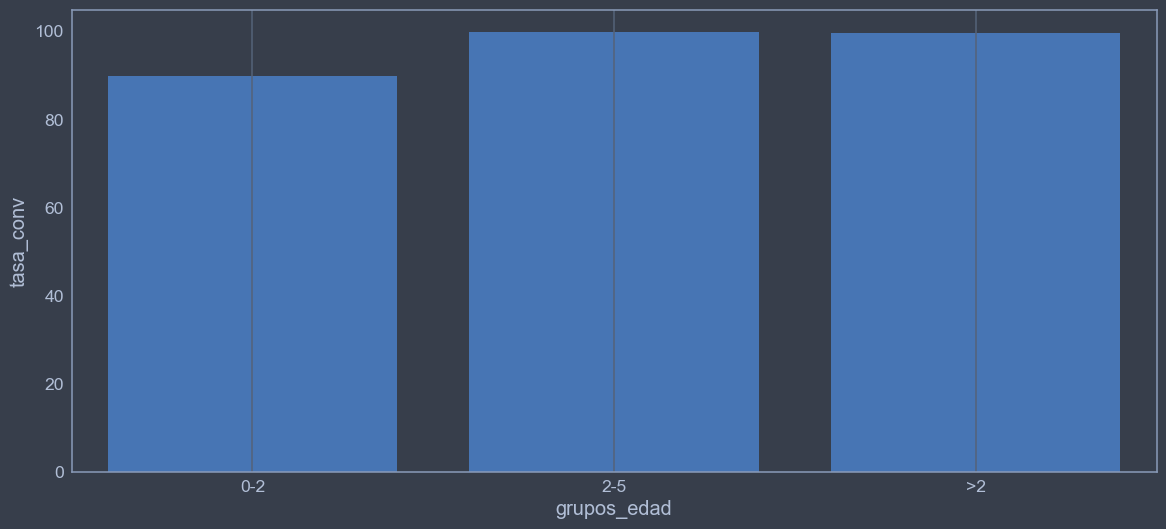

In [81]:
# Creemos subbrupos de edades y calculemos las tasas de conversión en cada caso

# Nueva columna en el dataset: "grupos_edad"
data.loc[:,'grupos_edad'] = "0-2"
data.loc[data['CANTIDAD ']>2,'grupos_edad'] = ">2"
data.loc[(data['CANTIDAD ']>3)&(data['CANTIDAD ']<=5), 'grupos_edad'] = "2-5"

# Y grafiquemos la tasa de conversión para esta nueva columna
graficar_tasas_conversion('grupos_edad','GENERO_bin',type='bar')

## Observaciones:

- Tenemos 3 rangos bastante diferenciados y para los cuales se alcanzan diferentes tasas de conversión: 0-2 180 veces , 2-5 mas de 200, >2 mas 200

In [82]:
# Y eliminemos la columna "age" (dejando sólo los grupos de edad)
# data.drop(columns=['age'], inplace=True)

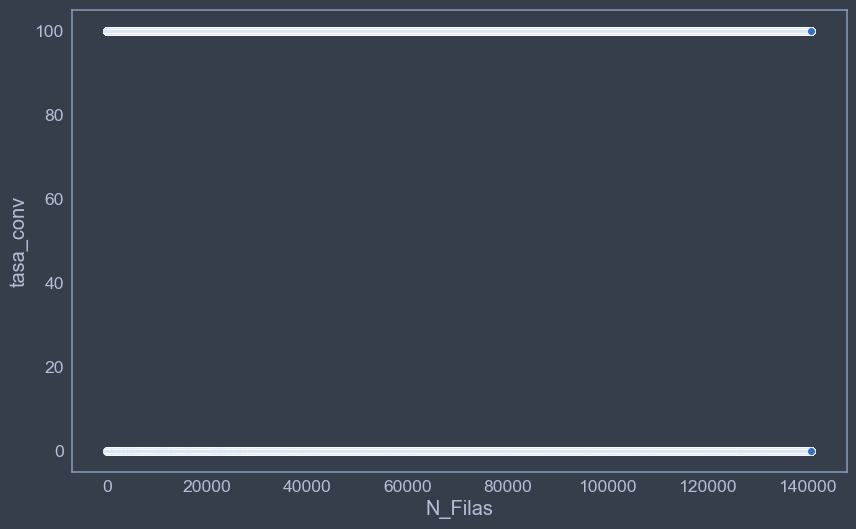

In [83]:
# Realicemos el mismo análisis pero para la variable 'balance'
graficar_tasas_conversion('N_Filas','GENERO_bin',type='scatter')

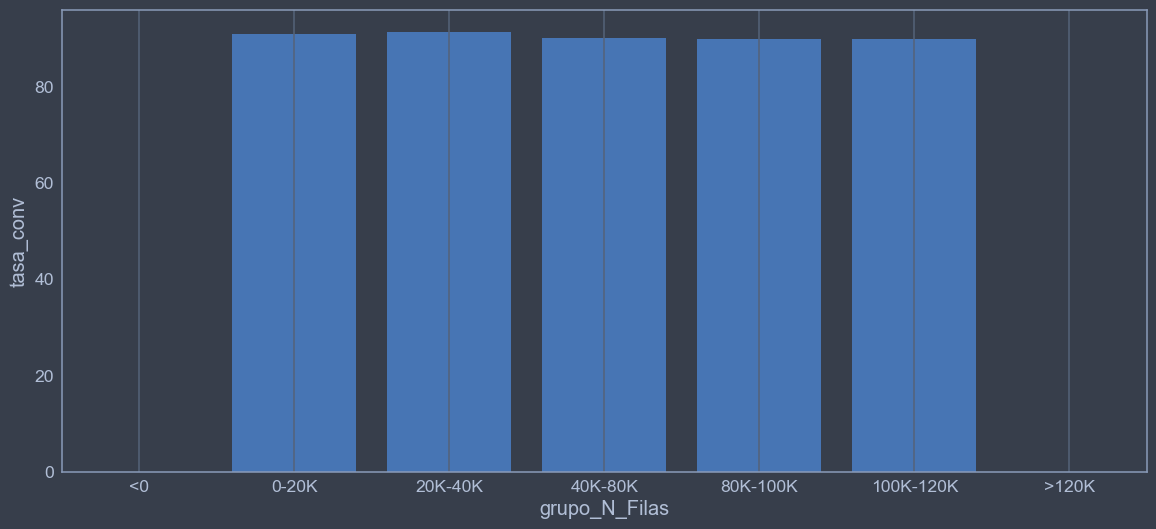

In [84]:
# No resulta fácil ver un patrón. Al igual que con la edad generemos


# Nueva columna en el dataset: "grupos_balance"
data.loc[:,'grupo_N_Filas'] = "<0"
data.loc[(data['N_Filas']>=0) & (data['N_Filas']<20000),'grupo_N_Filas'] = "0-20K"
data.loc[(data['N_Filas']>=20000) & (data['N_Filas']<40000),'grupo_N_Filas'] = "20K-40K"
data.loc[(data['N_Filas']>=40000) & (data['N_Filas']<80000),'grupo_N_Filas'] = "40K-80K"
data.loc[(data['N_Filas']>=80000) & (data['N_Filas']<100000),'grupo_N_Filas'] = "80K-100K"
data.loc[(data['N_Filas']>=100000) & (data['N_Filas']<1200000),'grupo_N_Filas'] = "100K-120K"
data.loc[data['N_Filas']>=1200000,'grupo_N_Filas'] = ">120K"

# Y grafiquemos la tasa de conversión para esta nueva columna
#graficar_tasas_conversion('grupos_balance','y_bin',type='bar')
orden = ['<0', '0-20K', '20K-40K', '40K-80K', '80K-100K', '100K-120K', '>120K']
graficar_tasas_conversion('grupo_N_Filas','GENERO_bin',type='bar', order=orden)

# Observaciones:

- Tener en cuenta que la columna utilizada no sirve debido a que este ejercicio solo se aplica para columnas con tipo numerico, ya sea edad, dinero, precio de algo etc, se realizo el ejercicio para tener claro este tema en la exploraciòn de datos. 

# Variables categoricas 

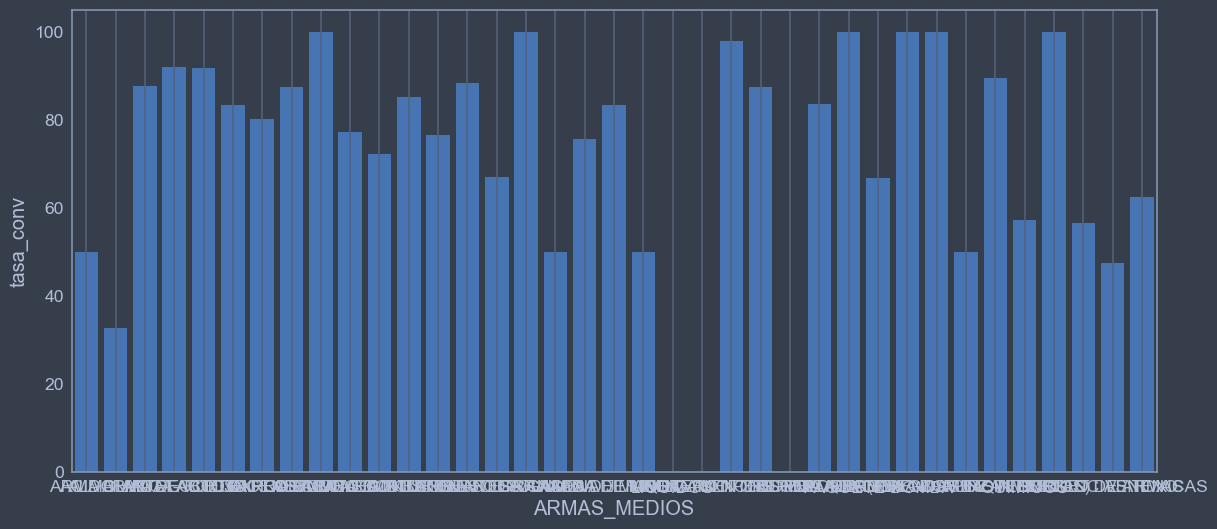

In [85]:
columna = 'ARMAS_MEDIOS'
top_10 = data[columna].value_counts().nlargest(10)
data['ARMAS-REDU'] = top_10 = data[columna].value_counts().nlargest(10)
graficar_tasas_conversion('ARMAS_MEDIOS', 'GENERO_bin', type='bar')

Se realizo el grafico, pero como podemos evidenciar para este dataset es complicado utilizando todos los subniveles, debido a que cuenta con bastantes.

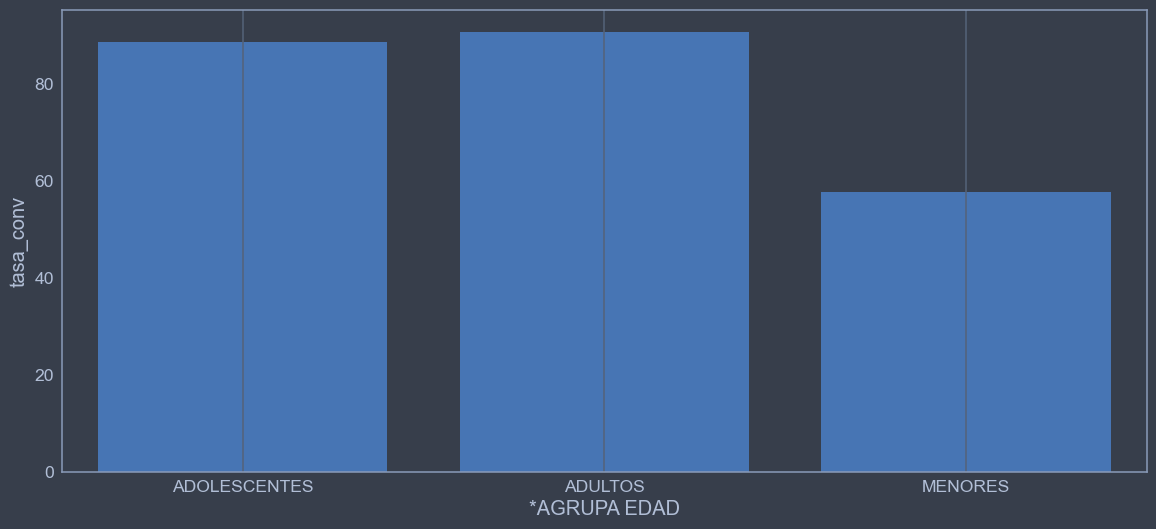

In [86]:
graficar_tasas_conversion('*AGRUPA EDAD', 'GENERO_bin', type='bar')

En este apartado graficamos con la variable GENERO_bin pero con las variables categoricas, esto para ver el comportamiento entre la columna de edades y las columnas de tipo de armas y grupos de edades.

## 3.Análisis bivariado

El analisis bivariado es el análisis exploratorio y analizar posibles interacciones entre pares de variables predictoras y su impacto en la variable a predecir.

Esto se conoce como análisis bivariado.

Como existen muchas posibles combinaciones analizaremos únicamente los pares con mayor potencial según el orden de importancia definido en el resumen del análisis univariado.

La forma más sencilla de hacer este análisis es a través de gráficas (aunque también se podrían usar herramientas estadísticas más sofisticadas).

#### Aspectos a tener en cuenta 

De forma similar a como ocurre con el análisis univariado, este análisis nos mostrará sólo una faceta de las posibles relaciones entre pares de variables predictoras y la variable a predecir, y no es suficiente para extraer conclusiones definitivas (aunque nos dará una pista más detallada en comparación con el análisis univariado).

Para este caso vamos a graficar la tasa de conversion de la columna Genero_bin esto por que tenemos los generos masculino y femenino, vamos a Examina la relación entre dos variables al mismo tiempo. 

In [87]:
# Tasa de conversión para dos columnas
def graficar_tc_bivariada(col_list, orden=None):
  tc = data.groupby(col_list)['GENERO_bin'].mean().to_frame().reset_index()

  # Gráfica
  plt.figure(figsize=(13,7))
  ax = sns.pointplot(x=tc['GENERO_bin'], y=tc[col_list[0]], hue=tc[col_list[1]], join=False, order=orden)
  ax.yaxis.grid(True)
  ax.xaxis.grid(True)
  plt.title(f'Tasa de conversión para {col_list[0]} y {col_list[1]}')
  plt.xlabel('Tasa de conversión (%)')
  plt.xlim((0,1));

C:\Users\user\AppData\Local\Temp\ipykernel_17632\1664760143.py:7: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax = sns.pointplot(x=tc['GENERO_bin'], y=tc[col_list[0]], hue=tc[col_list[1]], join=False, order=orden)


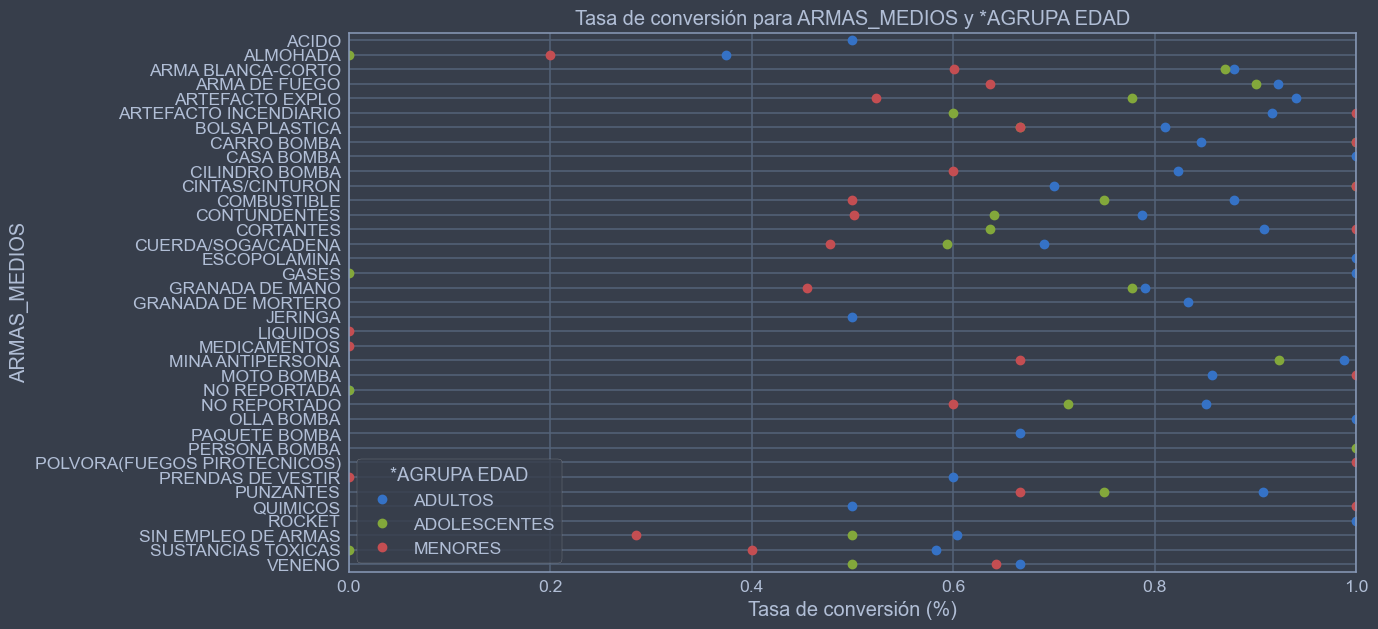

In [88]:
graficar_tc_bivariada(['ARMAS_MEDIOS','*AGRUPA EDAD'])

   En la grafica podemos evidenciar que los adultos (Azul) son los que tienen mas formas de homicidios, entre mas cerca este al 1 significa  que la gran mayoria de las personas de ese grupo son masculinas, esto quiere decir que para los homicidios que utilizaron las siguientes armas la gran mayoria son hombres:
 - Arma blanca corto 
 - Arma de fuego
 - Mina antipersonas 
 - Escopolamina

Ahora vamos a filtrar el dataset por año para mirar el total de homicidios en cada año.

## Año 2010 - 2022

In [89]:
import re
expresion_regular = r'^[A-M].*'  # Por ejemplo, nombres que comienzan con las letras A-M
expresion_regular = r'^(\d{4})-\d{2}-\d{2}$'
data['FECHA '] = data['FECHA '].astype(str)
data['año'] = data['FECHA '].str.extract(expresion_regular)

# Filtrar el DataFrame por el año extraído (por ejemplo, '2022')
año_a_filtrar_2010 = '2010'
df_filtrado = data[data['año'] == año_a_filtrar_2010]

# Imprimir el DataFrame filtrado
df_filtrado
suma_total_2010 = df_filtrado['CANTIDAD '].sum()
print("La suma total de homicidios en el año 2010:", suma_total_2010)

# Filtrar el DataFrame por el año extraído (por ejemplo, '2022')
año_a_filtrar_2011 = '2011'
df_filtrado = data[data['año'] == año_a_filtrar_2011]

# Imprimir el DataFrame filtrado
df_filtrado
suma_total_2011 = df_filtrado['CANTIDAD '].sum()
print("La suma total de homicidios en el año 2011:", suma_total_2011)

# Filtrar el DataFrame por el año extraído (por ejemplo, '2022')
año_a_filtrar_2012 = '2012'
df_filtrado = data[data['año'] == año_a_filtrar_2012]

# Imprimir el DataFrame filtrado
df_filtrado
suma_total_2012 = df_filtrado['CANTIDAD '].sum()
print("La suma total de homicidios en el año 2012:", suma_total_2012)

# Filtrar el DataFrame por el año extraído (por ejemplo, '2022')
año_a_filtrar_2013 = '2013'
df_filtrado = data[data['año'] == año_a_filtrar_2013]

# Imprimir el DataFrame filtrado
df_filtrado
suma_total_2013 = df_filtrado['CANTIDAD '].sum()
print("La suma total de homicidios en el año 2013:", suma_total_2013)


# Filtrar el DataFrame por el año extraído (por ejemplo, '2022')
año_a_filtrar_2014 = '2014'
df_filtrado = data[data['año'] == año_a_filtrar_2014]

# Imprimir el DataFrame filtrado
df_filtrado
suma_total_2014 = df_filtrado['CANTIDAD '].sum()
print("La suma total de homicidios en el año 2014:", suma_total_2014)

# Filtrar el DataFrame por el año extraído (por ejemplo, '2022')
año_a_filtrar_2015 = '2015'
df_filtrado = data[data['año'] == año_a_filtrar_2015]

# Imprimir el DataFrame filtrado
df_filtrado
suma_total_2015 = df_filtrado['CANTIDAD '].sum()
print("La suma total de homicidios en el año 2015:", suma_total_2015)

# Filtrar el DataFrame por el año extraído (por ejemplo, '2022')
año_a_filtrar_2016 = '2016'
df_filtrado = data[data['año'] == año_a_filtrar_2016]

# Imprimir el DataFrame filtrado
df_filtrado
suma_total_2016 = df_filtrado['CANTIDAD '].sum()
print("La suma total de homicidios en el año 2016:", suma_total_2016)

# Filtrar el DataFrame por el año extraído (por ejemplo, '2022')
año_a_filtrar_2017 = '2017'
df_filtrado = data[data['año'] == año_a_filtrar_2017]

# Imprimir el DataFrame filtrado
df_filtrado
suma_total_2017 = df_filtrado['CANTIDAD '].sum()
print("La suma total de homicidios en el año 2017:", suma_total_2017)

# Filtrar el DataFrame por el año extraído (por ejemplo, '2022')
año_a_filtrar_2018 = '2018'
df_filtrado = data[data['año'] == año_a_filtrar_2018]

# Imprimir el DataFrame filtrado
df_filtrado
suma_total_2018 = df_filtrado['CANTIDAD '].sum()
print("La suma total de homicidios en el año 2018:", suma_total_2018)

# Filtrar el DataFrame por el año extraído (por ejemplo, '2022')
año_a_filtrar_2019 = '2019'
df_filtrado = data[data['año'] == año_a_filtrar_2019]

# Imprimir el DataFrame filtrado
df_filtrado
suma_total_2019 = df_filtrado['CANTIDAD '].sum()
print("La suma total de homicidios en el año 2019:", suma_total_2019)

# Filtrar el DataFrame por el año extraído (por ejemplo, '2022')
año_a_filtrar_2020 = '2020'
df_filtrado = data[data['año'] == año_a_filtrar_2020]

# Imprimir el DataFrame filtrado
df_filtrado
suma_total_2020 = df_filtrado['CANTIDAD '].sum()
print("La suma total de homicidios en el año 2020:", suma_total_2020)

# Filtrar el DataFrame por el año extraído (por ejemplo, '2022')
año_a_filtrar_2021 = '2021'
df_filtrado = data[data['año'] == año_a_filtrar_2021]

# Imprimir el DataFrame filtrado
df_filtrado
suma_total_2021 = df_filtrado['CANTIDAD '].sum()
print("La suma total de homicidios en el año 2021:", suma_total_2021)


# Filtrar el DataFrame por el año extraído (por ejemplo, '2022')
año_a_filtrar_2022 = '2022'
df_filtrado = data[data['año'] == año_a_filtrar_2022]

# Imprimir el DataFrame filtrado
df_filtrado
suma_total_2022 = df_filtrado['CANTIDAD '].sum()
print("La suma total de homicidios en el año 2022:", suma_total_2022)




La suma total de homicidios en el año 2010: 15013
La suma total de homicidios en el año 2011: 15803
La suma total de homicidios en el año 2012: 16033
La suma total de homicidios en el año 2013: 14971
La suma total de homicidios en el año 2014: 12958
La suma total de homicidios en el año 2015: 12460
La suma total de homicidios en el año 2016: 12164
La suma total de homicidios en el año 2017: 12079
La suma total de homicidios en el año 2018: 12667
La suma total de homicidios en el año 2019: 12656
La suma total de homicidios en el año 2020: 12127
La suma total de homicidios en el año 2021: 13874
La suma total de homicidios en el año 2022: 8909


2013


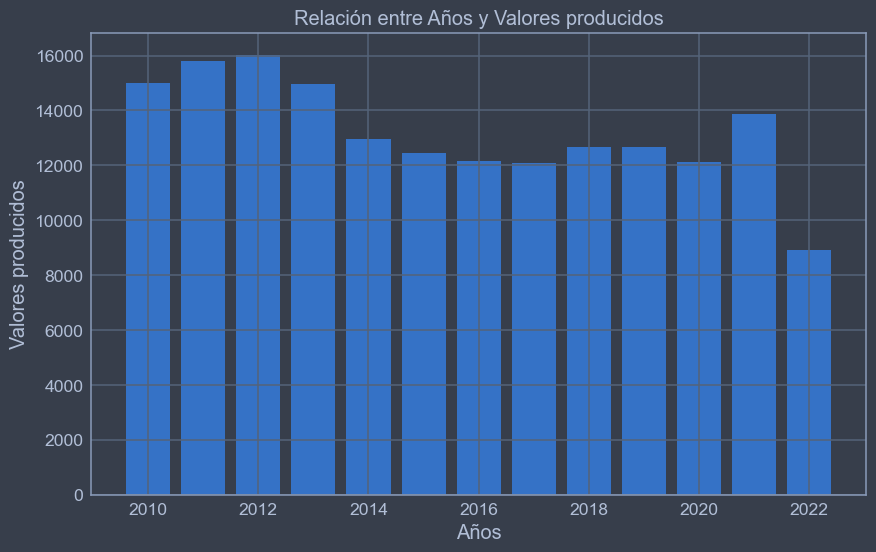

In [90]:
print(año_a_filtrar_2013)

data_años = {'Años': [2010, 2011, 2012, 2013,2014,2015,2016,2017,2018,2019,2020,2021,2022],
        'Homicidios': [suma_total_2010, suma_total_2011, suma_total_2012, suma_total_2013,
                        suma_total_2014, suma_total_2015, suma_total_2016, suma_total_2017,
                       suma_total_2018, suma_total_2019, suma_total_2020
                      , suma_total_2021, suma_total_2022]}

df_años_valores  = pd.DataFrame(data_años)


plt.figure(figsize=(10, 6))
plt.bar(df_años_valores['Años'].values, df_años_valores['Homicidios'].values)
plt.xlabel('Años')
plt.ylabel('Valores producidos')
plt.title('Relación entre Años y Valores producidos')
plt.show()

Como podemos ver el año con mas homicidios es el año 2012, seguidamente es el año 2011 y en el tercer lugar estan en el año 2013 y 2010, despues del año 2013 la cantidad de los homicidios disminuye significativamente, pero en el año 2021 roza con los 14000 homicidios.

In [91]:
año_a_filtrar_2010 = '2010'
df_filtrado = data[data['año'] == año_a_filtrar_2010]

valor_2010= df_filtrado['ARMAS_MEDIOS'].value_counts().idxmax()
print(f"El arma mas utilizada en el año 2010 es: {valor_2010}")

año_a_filtrar_2011 = '2011'
df_filtrado = data[data['año'] == año_a_filtrar_2011]

valor_2011= df_filtrado['ARMAS_MEDIOS'].value_counts().idxmax()
print(f"El arma mas utilizada en el año 2011 es: {valor_2011}")

año_a_filtrar_2012 = '2012'
df_filtrado = data[data['año'] == año_a_filtrar_2012]

valor_2012= df_filtrado['ARMAS_MEDIOS'].value_counts().idxmax()
print(f"El arma mas utilizada en el año 2012 es: {valor_2012}")

año_a_filtrar_2013 = '2013'
df_filtrado = data[data['año'] == año_a_filtrar_2013]

valor_2013= df_filtrado['ARMAS_MEDIOS'].value_counts().idxmax()
print(f"El arma mas utilizada en el año 2013 es: {valor_2013}")


año_a_filtrar_2014= '2014'
df_filtrado = data[data['año'] == año_a_filtrar_2014]

valor_2014= df_filtrado['ARMAS_MEDIOS'].value_counts().idxmax()
print(f"El arma mas utilizada en el año 2014 es: {valor_2014}")

año_a_filtrar_2015 = '2015'
df_filtrado = data[data['año'] == año_a_filtrar_2015]

valor_2015= df_filtrado['ARMAS_MEDIOS'].value_counts().idxmax()
print(f"El arma mas utilizada en el año 2015 es: {valor_2015}")

año_a_filtrar_2016 = '2016'
df_filtrado = data[data['año'] == año_a_filtrar_2016]

valor_2016= df_filtrado['ARMAS_MEDIOS'].value_counts().idxmax()
print(f"El arma mas utilizada en el año 2016 es: {valor_2016}")

año_a_filtrar_2017 = '2017'
df_filtrado = data[data['año'] == año_a_filtrar_2017]

valor_2017= df_filtrado['ARMAS_MEDIOS'].value_counts().idxmax()
print(f"El arma mas utilizada en el año 2017 es: {valor_2017}")



año_a_filtrar_2018= '2018'
df_filtrado = data[data['año'] == año_a_filtrar_2018]

valor_2018= df_filtrado['ARMAS_MEDIOS'].value_counts().idxmax()
print(f"El arma mas utilizada en el año 2018 es: {valor_2018}")

año_a_filtrar_2019 = '2019'
df_filtrado = data[data['año'] == año_a_filtrar_2019]

valor_2019= df_filtrado['ARMAS_MEDIOS'].value_counts().idxmax()
print(f"El arma mas utilizada en el año 2019 es: {valor_2019}")

año_a_filtrar_2020 = '2020'
df_filtrado = data[data['año'] == año_a_filtrar_2020]

valor_2020= df_filtrado['ARMAS_MEDIOS'].value_counts().idxmax()
print(f"El arma mas utilizada en el año 2020 es: {valor_2020}")

año_a_filtrar_2021 = '2021'
df_filtrado = data[data['año'] == año_a_filtrar_2021]

valor_2021= df_filtrado['ARMAS_MEDIOS'].value_counts().idxmax()
print(f"El arma mas utilizada en el año 2021 es: {valor_2021}")

año_a_filtrar_2022 = '2022'
df_filtrado = data[data['año'] == año_a_filtrar_2022]

valor_2022= df_filtrado['ARMAS_MEDIOS'].value_counts().idxmax()
print(f"El arma mas utilizada en el año 2022 es: {valor_2022}")

El arma mas utilizada en el año 2010 es: ARMA DE FUEGO
El arma mas utilizada en el año 2011 es: ARMA DE FUEGO
El arma mas utilizada en el año 2012 es: ARMA DE FUEGO
El arma mas utilizada en el año 2013 es: ARMA DE FUEGO
El arma mas utilizada en el año 2014 es: ARMA DE FUEGO
El arma mas utilizada en el año 2015 es: ARMA DE FUEGO
El arma mas utilizada en el año 2016 es: ARMA DE FUEGO
El arma mas utilizada en el año 2017 es: ARMA DE FUEGO
El arma mas utilizada en el año 2018 es: ARMA DE FUEGO
El arma mas utilizada en el año 2019 es: ARMA DE FUEGO
El arma mas utilizada en el año 2020 es: ARMA DE FUEGO
El arma mas utilizada en el año 2021 es: ARMA DE FUEGO
El arma mas utilizada en el año 2022 es: ARMA DE FUEGO


Como podemos ver el tipo de arma mas utilizada en todos los años desde el 2010 al 2022 es el tipo de arma de fuego

Ahora vamos a extrar el mes de la fecha de nuestro dataset, esto lo logramos con expresiones regulares.

In [92]:
expresion_regular_mes = r'-(\d{2})-'
data['FECHA '] = data['FECHA ' ].astype(str)
data['mes'] = data['FECHA '].apply(lambda x: re.search(expresion_regular_mes, x).group(1) if re.search(expresion_regular_mes, x) else None)
data['mes'].value_counts(dropna=False)

01    12466
07    12377
05    12359
12    12351
08    12166
06    11987
03    11759
04    11249
11    11130
10    10986
09    10967
02    10916
Name: mes, dtype: int64

Una vez extraido el mes vamos a convertirlo en su nombre normal, esto lo hacemos con un simple mapeo.

In [93]:
nombre_meses = {'01': 'Enero', '02': 'Febrero', '03': 'Marzo', '04': 'Abril', '05': 'Mayo', '06': 'Junio',
                '07': 'Julio', '08': 'Agosto', '09': 'Septiembre',
                '10': 'Octubre', '11': 'Noviembre', '12': 'Diciembre'}
data['mes_nombre'] = data['mes'].map(nombre_meses)
data['mes_nombre'].value_counts(dropna=False)


Enero         12466
Julio         12377
Mayo          12359
Diciembre     12351
Agosto        12166
Junio         11987
Marzo         11759
Abril         11249
Noviembre     11130
Octubre       10986
Septiembre    10967
Febrero       10916
Name: mes_nombre, dtype: int64

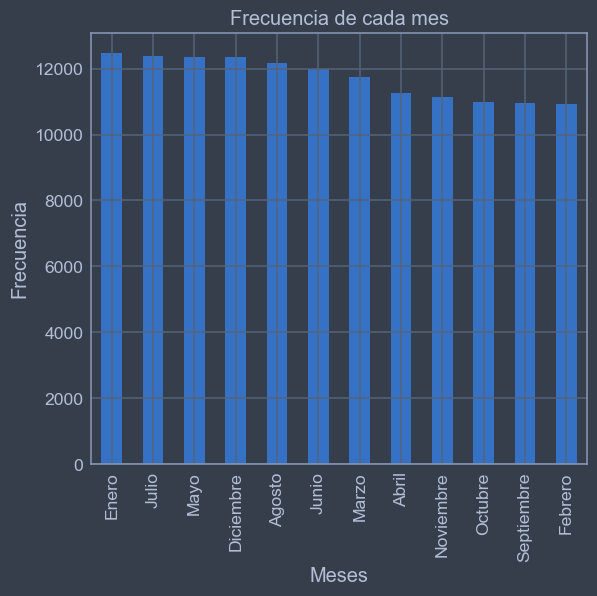

In [94]:
# Graficar la frecuencia de cada mes
data['mes_nombre'].value_counts().plot(kind='bar')

# Etiquetas y título del gráfico
plt.xlabel('Meses')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de cada mes')

# Mostrar el gráfico
plt.show()

Como podemos evidenciar en la grafica anterior, los homicidios tienen mas frecuencia en el mes de Enero, seguido de este es julio y como tercer mes es mayo.

In [103]:
genero = 'MASCULINO'
filtro = (data['GENERO'] == genero )
df_filtrado = data[filtro]
#df_filtrado['CANTIDAD '].value_counts().plot(kind='bar')
sum_M = df_filtrado['CANTIDAD '].sum()
Armas= df_filtrado['ARMAS_MEDIOS'].value_counts().idxmax()
print(f"El arma mas utilizada en el año 2020 es: {Armas}")
print("La cantidad de homicidios a hombre fue:",sum_M)

El arma mas utilizada en el año 2020 es: ARMA DE FUEGO
La cantidad de homicidios a hombre fue: 157495


In [105]:
genero = 'FEMENINO'
filtro = (data['GENERO'] == genero )
df_filtrado = data[filtro]
#df_filtrado['CANTIDAD '].value_counts().plot(kind='bar')
sum_F = df_filtrado['CANTIDAD '].sum()
ArmasF= df_filtrado['ARMAS_MEDIOS'].value_counts().idxmax()
print("La cantidad de homicidios a Femenino fue:",sum_F)
print(f"El arma mas utilizada en el año 2020 es: {ArmasF}")

La cantidad de homicidios a Femenino fue: 14203
El arma mas utilizada en el año 2020 es: ARMA DE FUEGO


In [112]:
data['DEPARTAMENTO '].value_counts(dropna=False)

ANTIOQUIA             24221
VALLE                 23791
CUNDINAMARCA          14063
CAUCA                  7338
NARIÑO                 6161
ATLÁNTICO              5897
NORTE DE SANTANDER     5488
BOLÍVAR                4495
CÓRDOBA                4343
TOLIMA                 3871
SANTANDER              3664
META                   3601
RISARALDA              3528
MAGDALENA              3297
HUILA                  3231
CALDAS                 2853
CESAR                  2769
QUINDÍO                2607
CHOCÓ                  2424
GUAJIRA                2310
CAQUETÁ                2234
PUTUMAYO               1933
SUCRE                  1794
ARAUCA                 1515
BOYACÁ                 1234
CASANARE                907
GUAVIARE                444
SAN ANDRÉS              277
VICHADA                 214
AMAZONAS                148
GUAINÍA                  31
VAUPÉS                   30
Name: DEPARTAMENTO , dtype: int64

In [113]:
data['MUNICIPIO'].value_counts(dropna=False)

BOGOTÁ D.C. (CT)     9208
CALI (CT)            8943
MEDELLÍN (CT)        6075
BARRANQUILLA (CT)    3363
CARTAGENA (CT)       2470
                     ... 
GUAVATÁ                 1
GACHANTIVÁ              1
PANQUEBA                1
NUEVO COLÓN             1
PALMAR                  1
Name: MUNICIPIO, Length: 1008, dtype: int64

# Conclusiones
- ¿Que genero es el mas asesinado en el periodo de tiempo del dataset? 

    - Lastimosamente el genero mas asesinado es el masculino con  157495 homicidios en el periodo 2010 al 2022
    
    
- ¿Cual es el Departamento que tiene mas homicidios? 
    - Lastimosamente el departamento con mas asesinado es el departamento de antioquia con  24221 casos en el periodo 2010 al 2022
         
- ¿Cual es el Municipio que tiene mas homicidios? 

    - Lastimosamente el grupo de edad  mas asesinados es el municipio de BOGOTÁ D.C. con  9208 casos en el periodo 2010 al 2022
    
- ¿Que grupo edad es el mas asesinado? 

    - Lastimosamente el grupo de edad  mas asesinados son: los adultos, con mas de 120000 homicidios registrados en el periodo 2010 al 2022
    

- ¿Que mes es el que ocurre mas asesinatos?
     - El mes de Enero, seguido de este es julio y como tercer mes es mayo.

- ¿Cuantos Homiidios hay en cada año? 

    - La suma total de homicidios en el año 2010: 15013
      La suma total de homicidios en el año 2011: 15803
      La suma total de homicidios en el año 2012: 16033
      La suma total de homicidios en el año 2013: 14971
      La suma total de homicidios en el año 2014: 12958
      La suma total de homicidios en el año 2015: 12460
      La suma total de homicidios en el año 2016: 12164
      La suma total de homicidios en el año 2017: 12079
      La suma total de homicidios en el año 2018: 12667
      La suma total de homicidios en el año 2019: 12656
      La suma total de homicidios en el año 2020: 12127
      La suma total de homicidios en el año 2021: 13874
      La suma total de homicidios en el año 2022: 8909

- ¿Cual es el tipo de arma mas utilizada y cual es la mas utilizada en cada año? 

   - El arma mas utilizada en el año 2010 es: ARMA DE FUEGO
     El arma mas utilizada en el año 2011 es: ARMA DE FUEGO
     El arma mas utilizada en el año 2012 es: ARMA DE FUEGO
     El arma mas utilizada en el año 2013 es: ARMA DE FUEGO
     El arma mas utilizada en el año 2014 es: ARMA DE FUEGO
     El arma mas utilizada en el año 2015 es: ARMA DE FUEGO
     El arma mas utilizada en el año 2016 es: ARMA DE FUEGO
     El arma mas utilizada en el año 2017 es: ARMA DE FUEGO
     El arma mas utilizada en el año 2018 es: ARMA DE FUEGO
     El arma mas utilizada en el año 2019 es: ARMA DE FUEGO
     El arma mas utilizada en el año 2020 es: ARMA DE FUEGO
     El arma mas utilizada en el año 2021 es: ARMA DE FUEGO
     El arma mas utilizada en el año 2022 es: ARMA DE FUEGO





- ¿Cual es el tipo de arma mas utilizada para cometer los homicidios de los dos generos?

    - El arma mas utilizada para ambos generos es el tipo de arma de fuego. 
    

 

## Regresion Lineal

In [116]:
DF = {'Homicidios': [suma_total_2010, suma_total_2011, suma_total_2012, suma_total_2013,suma_total_2014,
              suma_total_2015, suma_total_2016, suma_total_2017, suma_total_2018,
              suma_total_2019,suma_total_2020,suma_total_2021,suma_total_2022],
        'Año': ['2010', '2011', '2012', '2013','2014','2015','2016','2017','2018','2019',
               '2020','2021','2022']}
df=pd.DataFrame(DF)
df

,Homicidios,Año
0,15013,2010
1,15803,2011
2,16033,2012
3,14971,2013
4,12958,2014
5,12460,2015
6,12164,2016
7,12079,2017
8,12667,2018
9,12656,2019


Primero importamos las librerias para utilizarlas en nuestro modelo

In [146]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt

#### División en conjuntos de entrenamiento y prueba:
Dividimos los datos en conjuntos de entrenamiento (80%) y prueba (20%).

In [147]:
X = df[['Año']]  # Variable independiente (Año)
y = df['Homicidios']  # Variable dependiente (Homicidios)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Creamos un modelo de regresión lineal y lo entrenamos con los datos de entrenamiento.

In [148]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

##### Predicciones en el conjunto de prueba:
Utilizamos el modelo entrenado para hacer predicciones sobre el conjunto de prueba.

In [149]:
y_pred = model.predict(X_test)

Evaluación del rendimiento del modelo:

In [150]:
print('Error absoluto medio:', metrics.mean_absolute_error(y_test, y_pred))
print('Error cuadrático medio:', metrics.mean_squared_error(y_test, y_pred))
print('Raíz cuadrada del error cuadrático medio:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Error absoluto medio: 1752.9373219373326
Error cuadrático medio: 4069358.5713832867
Raíz cuadrada del error cuadrático medio: 2017.265121738659


Imprimimos métricas de rendimiento para evaluar qué tan bien se ajusta el modelo a los datos de prueba.

 #### Visualización de la regresión linea

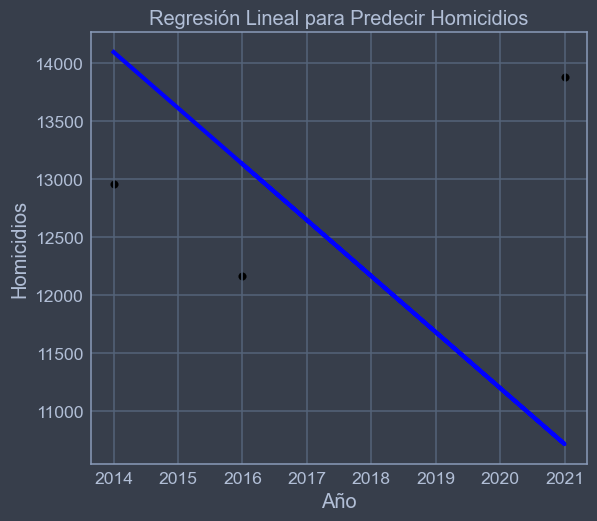

In [151]:
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Año')
plt.ylabel('Homicidios')
plt.title('Regresión Lineal para Predecir Homicidios')
plt.show()

Graficamos los datos reales y la regresión lineal para visualizar cómo el modelo se ajusta a los datos de prueba.

#### Predicciones para futuros años:

In [152]:
nuevos_años = np.array([2023, 2024, 2025]).reshape(-1, 1)
predicciones_futuras = model.predict(nuevos_años)
print('Predicciones futuras:', predicciones_futuras)

Predicciones futuras: [9747.08547009 9264.24786325 8781.41025641]


C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Utilizamos el modelo para hacer predicciones sobre años futuros (2023, 2024, 2025 en este ejemplo).

### Ahora vamos a realizar la prediccion con el algoritmo de arboles de decision  

Importamos las librerias 

In [176]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
import graphviz

Crear y entrenar el modelo de árbol de decisión:
   Creamos un modelo de árbol de decisión y lo entrenamos con los datos de entrenamiento.

In [177]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

Utilizamos el modelo entrenado para hacer predicciones sobre el conjunto de prueba.

In [178]:
y_pred = model.predict(X_test)

Imprimimos métricas de rendimiento para evaluar qué tan bien se ajusta el modelo a los datos de prueba.

In [179]:
print('Error absoluto medio:', metrics.mean_absolute_error(y_test, y_pred))
print('Error cuadrático medio:', metrics.mean_squared_error(y_test, y_pred))
print('Raíz cuadrada del error cuadrático medio:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Error absoluto medio: 1352.0
Error cuadrático medio: 2397264.6666666665
Raíz cuadrada del error cuadrático medio: 1548.3102617584973


Visualizar el árbol de decisión

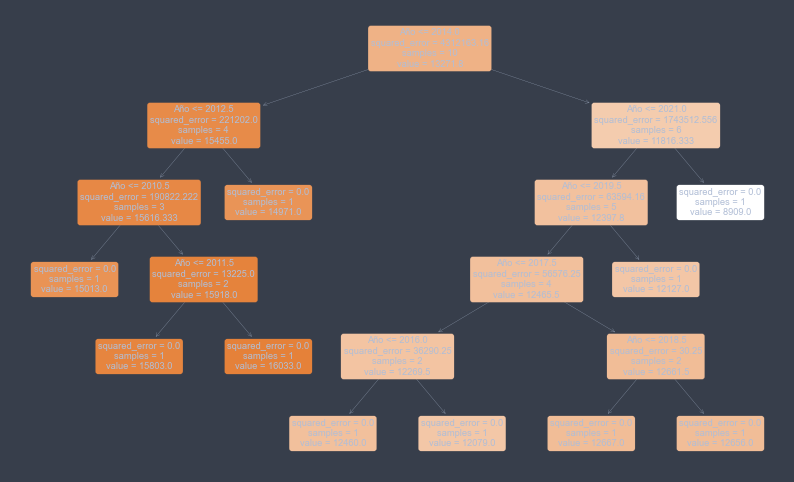

In [184]:
plt.figure(figsize=(10, 6))
plot_tree(model, filled=True, feature_names=['Año'], rounded=True)
plt.show()



Hacer predicciones para futuros años:Utilizamos el modelo para hacer predicciones sobre años futuros (2023, 2024, 2025 en este ejemplo).

In [158]:
nuevos_años = np.array([2023, 2024, 2025]).reshape(-1, 1)
predicciones_futuras = model.predict(nuevos_años)
print('Predicciones futuras:', predicciones_futuras)

Predicciones futuras: [8909. 8909. 8909.]


C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


Error Absoluto Medio (MAE):

El árbol de decisión tiene un MAE más bajo (1352.0) en comparación con la regresión lineal (1752.94). Un MAE más bajo indica un mejor rendimiento en términos de error absoluto promedio.
Error Cuadrático Medio (MSE):

El árbol de decisión tiene un MSE más bajo (2397264.67) en comparación con la regresión lineal (4069358.57). Un MSE más bajo indica un mejor rendimiento en términos de penalización por errores cuadráticos.
Raíz Cuadrada del Error Cuadrático Medio (RMSE):

El árbol de decisión tiene una RMSE más baja (1548.31) en comparación con la regresión lineal (2017.27). Una RMSE más baja indica un mejor rendimiento en términos de la magnitud promedio de los errores.
En general, basándonos en estas métricas, el árbol de decisión parece tener un mejor rendimiento que la regresión lineal en este conjunto de datos y para el problema específico. Sin embargo, ten en cuenta que la elección del modelo también puede depender de otros factores, como la interpretabilidad del modelo, la complejidad, y la capacidad para manejar diferentes tipos de relaciones entre las variables.
